# import libraries

In [1]:
import csv
import pandas as pd 
import matplotlib.pyplot as plt

# load data

In [2]:
city_data=pd.read_csv("city_data.csv")
city_list=pd.read_csv("city_list.csv")
global_data=pd.read_csv("global_data.csv")

# city_data work

In [3]:
city_data["10_Y_MA"]=0
city_data

,year,city,country,avg_temp,10_Y_MA
0,1849,Abidjan,Côte D'Ivoire,25.58,0
1,1850,Abidjan,Côte D'Ivoire,25.52,0
2,1851,Abidjan,Côte D'Ivoire,25.67,0
3,1852,Abidjan,Côte D'Ivoire,NaN,0
4,1853,Abidjan,Côte D'Ivoire,NaN,0
...,...,...,...,...,...
70787,2009,Zapopan,Mexico,21.76,0
70788,2010,Zapopan,Mexico,20.90,0
70789,2011,Zapopan,Mexico,21.55,0
70790,2012,Zapopan,Mexico,21.52,0


### check if there is empty values

In [4]:
city_data.isnull().sum()

year           0
city           0
country        0
avg_temp    2547
10_Y_MA        0
dtype: int64

### to get unique names of the cities

In [5]:
city_unique= city_data["city"].unique()
len(city_unique)

329

### create new dataFrame to calculate moving average for each 10 years for each city individualy

In [6]:
new_city_data= pd.DataFrame(columns=city_data.columns)
for i in city_unique:
    sub = city_data[city_data["city"] == i]
    sub["avg_temp"] = sub["avg_temp"].fillna(sub["avg_temp"].median())
    for j in range(9,len(sub)):
        count=0
        for k in range(j-9,j+1):
            count+=sub["avg_temp"].iloc[k]  # count for ten years
        sub["10_Y_MA"].iloc[j]=count/10.0   # get the average 
    print(sub.head(12))
    new_city_data=new_city_data.append(sub, ignore_index=True)    # append the sub dataFrame to the new dataFrame 
                                                                  # after calculate the moving average

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

    year     city        country  avg_temp  10_Y_MA
0   1849  Abidjan  Côte D'Ivoire     25.58    0.000
1   1850  Abidjan  Côte D'Ivoire     25.52    0.000
2   1851  Abidjan  Côte D'Ivoire     25.67    0.000
3   1852  Abidjan  Côte D'Ivoire     26.23    0.000
4   1853  Abidjan  Côte D'Ivoire     26.23    0.000
5   1854  Abidjan  Côte D'Ivoire     26.23    0.000
6   1855  Abidjan  Côte D'Ivoire     26.23    0.000
7   1856  Abidjan  Côte D'Ivoire     26.28    0.000
8   1857  Abidjan  Côte D'Ivoire     25.17    0.000
9   1858  Abidjan  Côte D'Ivoire     25.49   25.863
10  1859  Abidjan  Côte D'Ivoire     25.92   25.897
11  1860  Abidjan  Côte D'Ivoire     25.46   25.891
     year       city               country  avg_temp  10_Y_MA
165  1843  Abu Dhabi  United Arab Emirates     26.04    0.000
166  1844  Abu Dhabi  United Arab Emirates     26.26    0.000
167  1845  Abu Dhabi  United Arab Emirates     26.44    0.000
168  1846  Abu Dhabi  United Arab Emirates     26.44    0.000
169  1847  Abu

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

     year   city country  avg_temp  10_Y_MA
659  1791  Adana  Turkey     21.62    0.000
660  1792  Adana  Turkey     18.57    0.000
661  1793  Adana  Turkey     18.44    0.000
662  1794  Adana  Turkey     18.82    0.000
663  1795  Adana  Turkey     18.68    0.000
664  1796  Adana  Turkey     18.75    0.000
665  1797  Adana  Turkey     19.07    0.000
666  1798  Adana  Turkey     19.11    0.000
667  1799  Adana  Turkey     18.86    0.000
668  1800  Adana  Turkey     18.88   19.080
669  1801  Adana  Turkey     19.32   18.850
670  1802  Adana  Turkey     19.46   18.939
     year      city    country  avg_temp  10_Y_MA
882  1841  Adelaide  Australia     15.54    0.000
883  1842  Adelaide  Australia     15.61    0.000
884  1843  Adelaide  Australia     15.89    0.000
885  1844  Adelaide  Australia     15.26    0.000
886  1845  Adelaide  Australia     15.62    0.000
887  1846  Adelaide  Australia     16.12    0.000
888  1847  Adelaide  Australia     15.62    0.000
889  1848  Adelaide  Austral

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

      year       city country  avg_temp  10_Y_MA
1273  1796  Ahmadabad   India     26.35    0.000
1274  1797  Ahmadabad   India     27.45    0.000
1275  1798  Ahmadabad   India     25.82    0.000
1276  1799  Ahmadabad   India     26.62    0.000
1277  1800  Ahmadabad   India     26.56    0.000
1278  1801  Ahmadabad   India     25.73    0.000
1279  1802  Ahmadabad   India     27.01    0.000
1280  1803  Ahmadabad   India     26.77    0.000
1281  1804  Ahmadabad   India     27.09    0.000
1282  1805  Ahmadabad   India     26.67   26.607
1283  1806  Ahmadabad   India     26.57   26.629
1284  1807  Ahmadabad   India     26.10   26.494
      year         city        country  avg_temp  10_Y_MA
1491  1820  Albuquerque  United States      9.86    0.000
1492  1821  Albuquerque  United States     12.36    0.000
1493  1822  Albuquerque  United States     18.03    0.000
1494  1823  Albuquerque  United States     20.36    0.000
1495  1824  Albuquerque  United States     21.65    0.000
1496  1825  Alb

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

      year       city country  avg_temp  10_Y_MA
2440  1796  Allahabad   India     25.32    0.000
2441  1797  Allahabad   India     26.86    0.000
2442  1798  Allahabad   India     24.49    0.000
2443  1799  Allahabad   India     25.59    0.000
2444  1800  Allahabad   India     25.54    0.000
2445  1801  Allahabad   India     24.40    0.000
2446  1802  Allahabad   India     25.99    0.000
2447  1803  Allahabad   India     25.75    0.000
2448  1804  Allahabad   India     26.08    0.000
2449  1805  Allahabad   India     25.65   25.567
2450  1806  Allahabad   India     25.55   25.590
2451  1807  Allahabad   India     25.06   25.410
      year    city     country  avg_temp  10_Y_MA
2658  1820  Almaty  Kazakhstan     1.390   0.0000
2659  1821  Almaty  Kazakhstan     5.625   0.0000
2660  1822  Almaty  Kazakhstan     5.625   0.0000
2661  1823  Almaty  Kazakhstan     5.625   0.0000
2662  1824  Almaty  Kazakhstan     5.625   0.0000
2663  1825  Almaty  Kazakhstan     5.625   0.0000
2664  1826  A

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

      year    city country  avg_temp  10_Y_MA
3321  1755  Ankara  Turkey      9.62    0.000
3322  1756  Ankara  Turkey     10.99    0.000
3323  1757  Ankara  Turkey     10.82    0.000
3324  1758  Ankara  Turkey      8.33    0.000
3325  1759  Ankara  Turkey      9.93    0.000
3326  1760  Ankara  Turkey      9.28    0.000
3327  1761  Ankara  Turkey     10.34    0.000
3328  1762  Ankara  Turkey     10.34    0.000
3329  1763  Ankara  Turkey     10.34    0.000
3330  1764  Ankara  Turkey     10.34   10.033
3331  1765  Ankara  Turkey     10.34   10.105
3332  1766  Ankara  Turkey     10.34   10.040
      year    city country  avg_temp  10_Y_MA
3580  1829  Anshan   China     11.80    0.000
3581  1830  Anshan   China      7.12    0.000
3582  1831  Anshan   China      6.02    0.000
3583  1832  Anshan   China      6.00    0.000
3584  1833  Anshan   China      6.59    0.000
3585  1834  Anshan   China      6.94    0.000
3586  1835  Anshan   China      6.10    0.000
3587  1836  Anshan   China      6.

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

      year    city  country  avg_temp  10_Y_MA
4263  1864  Asmara  Eritrea     23.55    0.000
4264  1865  Asmara  Eritrea     23.97    0.000
4265  1866  Asmara  Eritrea     23.97    0.000
4266  1867  Asmara  Eritrea     23.97    0.000
4267  1868  Asmara  Eritrea     23.97    0.000
4268  1869  Asmara  Eritrea     23.97    0.000
4269  1870  Asmara  Eritrea     23.97    0.000
4270  1871  Asmara  Eritrea     23.97    0.000
4271  1872  Asmara  Eritrea     23.97    0.000
4272  1873  Asmara  Eritrea     23.97   23.928
4273  1874  Asmara  Eritrea     23.97   23.970
4274  1875  Asmara  Eritrea     23.48   23.921
      year    city     country  avg_temp  10_Y_MA
4413  1812  Astana  Kazakhstan      0.65    0.000
4414  1813  Astana  Kazakhstan      0.41    0.000
4415  1814  Astana  Kazakhstan      1.30    0.000
4416  1815  Astana  Kazakhstan    -12.13    0.000
4417  1816  Astana  Kazakhstan      5.63    0.000
4418  1817  Astana  Kazakhstan      0.50    0.000
4419  1818  Astana  Kazakhstan      2.5

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

      year     city        country  avg_temp  10_Y_MA
4876  1743  Atlanta  United States      8.13    0.000
4877  1744  Atlanta  United States     15.86    0.000
4878  1745  Atlanta  United States      8.13    0.000
4879  1746  Atlanta  United States     14.49    0.000
4880  1747  Atlanta  United States     14.49    0.000
4881  1748  Atlanta  United States     14.49    0.000
4882  1749  Atlanta  United States     14.49    0.000
4883  1750  Atlanta  United States     15.01    0.000
4884  1751  Atlanta  United States     15.73    0.000
4885  1752  Atlanta  United States      9.22   13.004
4886  1753  Atlanta  United States     14.42   13.633
4887  1754  Atlanta  United States     14.53   13.500
      year    city        country  avg_temp  10_Y_MA
5147  1820  Austin  United States     18.83    0.000
5148  1821  Austin  United States     20.75    0.000
5149  1822  Austin  United States     25.48    0.000
5150  1823  Austin  United States     19.34    0.000
5151  1824  Austin  United States

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


      year     city    country  avg_temp  10_Y_MA
6178  1825  Bandung  Indonesia     24.64    0.000
6179  1826  Bandung  Indonesia     24.76    0.000
6180  1827  Bandung  Indonesia     24.76    0.000
6181  1828  Bandung  Indonesia     24.76    0.000
6182  1829  Bandung  Indonesia     24.76    0.000
6183  1830  Bandung  Indonesia     24.76    0.000
6184  1831  Bandung  Indonesia     24.76    0.000
6185  1832  Bandung  Indonesia     24.76    0.000
6186  1833  Bandung  Indonesia     24.76    0.000
6187  1834  Bandung  Indonesia     24.76   24.748
6188  1835  Bandung  Indonesia     24.76   24.760
6189  1836  Bandung  Indonesia     24.76   24.760
      year       city country  avg_temp  10_Y_MA
6367  1796  Bangalore   India     24.49    0.000
6368  1797  Bangalore   India     25.18    0.000
6369  1798  Bangalore   India     24.65    0.000
6370  1799  Bangalore   India     24.81    0.000
6371  1800  Bangalore   India     24.85    0.000
6372  1801  Bangalore   India     24.49    0.000
6373  

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

      year    city                   country  avg_temp  10_Y_MA
6783  1856  Bangui  Central African Republic     24.98    0.000
6784  1857  Bangui  Central African Republic     23.49    0.000
6785  1858  Bangui  Central African Republic     24.30    0.000
6786  1859  Bangui  Central African Republic     24.31    0.000
6787  1860  Bangui  Central African Republic     24.59    0.000
6788  1861  Bangui  Central African Republic     24.22    0.000
6789  1862  Bangui  Central African Republic     25.21    0.000
6790  1863  Bangui  Central African Republic     24.98    0.000
6791  1864  Bangui  Central African Republic     24.98    0.000
6792  1865  Bangui  Central African Republic     24.98   24.604
6793  1866  Bangui  Central African Republic     24.98   24.604
6794  1867  Bangui  Central African Republic     24.98   24.753
      year       city country  avg_temp  10_Y_MA
6941  1743  Barcelona   Spain    13.810    0.000
6942  1744  Barcelona   Spain    16.980    0.000
6943  1745  Barcelona

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

      year    city  country  avg_temp  10_Y_MA
7782  1791  Beirut  Lebanon     21.57    0.000
7783  1792  Beirut  Lebanon     18.79    0.000
7784  1793  Beirut  Lebanon     19.73    0.000
7785  1794  Beirut  Lebanon     12.42    0.000
7786  1795  Beirut  Lebanon     21.30    0.000
7787  1796  Beirut  Lebanon     18.98    0.000
7788  1797  Beirut  Lebanon     19.23    0.000
7789  1798  Beirut  Lebanon     19.32    0.000
7790  1799  Beirut  Lebanon     20.13    0.000
7791  1800  Beirut  Lebanon     18.98   19.045
7792  1801  Beirut  Lebanon     20.56   18.944
7793  1802  Beirut  Lebanon     20.29   19.094
      year     city         country  avg_temp  10_Y_MA
8005  1743  Belfast  United Kingdom      8.45    0.000
8006  1744  Belfast  United Kingdom      9.15    0.000
8007  1745  Belfast  United Kingdom      4.51    0.000
8008  1746  Belfast  United Kingdom      8.68    0.000
8009  1747  Belfast  United Kingdom      8.68    0.000
8010  1748  Belfast  United Kingdom      8.68    0.000
8011

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


      year      city country  avg_temp  10_Y_MA
8729  1753  Benghazi   Libya     18.87    0.000
8730  1754  Benghazi   Libya     19.03    0.000
8731  1755  Benghazi   Libya     18.76    0.000
8732  1756  Benghazi   Libya     19.36    0.000
8733  1757  Benghazi   Libya     19.16    0.000
8734  1758  Benghazi   Libya     17.17    0.000
8735  1759  Benghazi   Libya     18.60    0.000
8736  1760  Benghazi   Libya     18.03    0.000
8737  1761  Benghazi   Libya     19.14    0.000
8738  1762  Benghazi   Libya     19.05   18.717
8739  1763  Benghazi   Libya     18.23   18.653
8740  1764  Benghazi   Libya     19.09   18.659
      year    city  country  avg_temp  10_Y_MA
8990  1743  Berlin  Germany      6.33    0.000
8991  1744  Berlin  Germany     10.36    0.000
8992  1745  Berlin  Germany      1.43    0.000
8993  1746  Berlin  Germany      8.93    0.000
8994  1747  Berlin  Germany      8.93    0.000
8995  1748  Berlin  Germany      8.93    0.000
8996  1749  Berlin  Germany      8.93    0.000

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

      year  city      country  avg_temp  10_Y_MA
9261  1743  Bern  Switzerland      3.54    0.000
9262  1744  Bern  Switzerland      8.19    0.000
9263  1745  Bern  Switzerland      0.36    0.000
9264  1746  Bern  Switzerland      6.83    0.000
9265  1747  Bern  Switzerland      6.83    0.000
9266  1748  Bern  Switzerland      6.83    0.000
9267  1749  Bern  Switzerland      6.83    0.000
9268  1750  Bern  Switzerland      7.61    0.000
9269  1751  Bern  Switzerland      7.73    0.000
9270  1752  Bern  Switzerland      2.86    5.761
9271  1753  Bern  Switzerland      6.83    6.090
9272  1754  Bern  Switzerland      6.55    5.926
      year    city country  avg_temp  10_Y_MA
9532  1796  Bhopal   India     25.06    0.000
9533  1797  Bhopal   India     26.27    0.000
9534  1798  Bhopal   India     24.24    0.000
9535  1799  Bhopal   India     25.33    0.000
9536  1800  Bhopal   India     25.30    0.000
9537  1801  Bhopal   India     24.15    0.000
9538  1802  Bhopal   India     25.77    0

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city        country  avg_temp  10_Y_MA
10457  1743  Boston  United States     1.190    0.000
10458  1744  Boston  United States     9.630    0.000
10459  1745  Boston  United States    -1.370    0.000
10460  1746  Boston  United States     7.355    0.000
10461  1747  Boston  United States     7.355    0.000
10462  1748  Boston  United States     7.355    0.000
10463  1749  Boston  United States     7.355    0.000
10464  1750  Boston  United States     7.880    0.000
10465  1751  Boston  United States     8.600    0.000
10466  1752  Boston  United States     0.360    5.571
10467  1753  Boston  United States     7.350    6.187
10468  1754  Boston  United States     7.750    5.999
       year        city   country  avg_temp  10_Y_MA
10728  1743  Bratislava  Slovakia      5.33    0.000
10729  1744  Bratislava  Slovakia     11.65    0.000
10730  1745  Bratislava  Slovakia      2.15    0.000
10731  1746  Bratislava  Slovakia      9.85    0.000
10732  1747  Bratislava  Slovakia

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year       city  country  avg_temp  10_Y_MA
11601  1743  Bucharest  Romania      5.31    0.000
11602  1744  Bucharest  Romania     12.95    0.000
11603  1745  Bucharest  Romania      2.28    0.000
11604  1746  Bucharest  Romania     10.82    0.000
11605  1747  Bucharest  Romania     10.82    0.000
11606  1748  Bucharest  Romania     10.82    0.000
11607  1749  Bucharest  Romania     10.82    0.000
11608  1750  Bucharest  Romania     11.48    0.000
11609  1751  Bucharest  Romania     12.01    0.000
11610  1752  Bucharest  Romania      5.31    9.262
11611  1753  Bucharest  Romania     10.74    9.805
11612  1754  Bucharest  Romania     10.81    9.591
       year      city  country  avg_temp  10_Y_MA
11872  1743  Budapest  Hungary      4.92    0.000
11873  1744  Budapest  Hungary     11.64    0.000
11874  1745  Budapest  Hungary      1.79    0.000
11875  1746  Budapest  Hungary      9.77    0.000
11876  1747  Budapest  Hungary      9.77    0.000
11877  1748  Budapest  Hungary      9

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year   city country  avg_temp  10_Y_MA
12578  1808  Cairo   Egypt     17.11    0.000
12579  1809  Cairo   Egypt     19.87    0.000
12580  1810  Cairo   Egypt     19.93    0.000
12581  1811  Cairo   Egypt     20.00    0.000
12582  1812  Cairo   Egypt     19.93    0.000
12583  1813  Cairo   Egypt     20.51    0.000
12584  1814  Cairo   Egypt     20.43    0.000
12585  1815  Cairo   Egypt     20.30    0.000
12586  1816  Cairo   Egypt     20.51    0.000
12587  1817  Cairo   Egypt     21.88   20.047
12588  1818  Cairo   Egypt     11.60   19.496
12589  1819  Cairo   Egypt     20.31   19.540
       year  city   country  avg_temp  10_Y_MA
12784  1825  Cali  Colombia     21.73    0.000
12785  1826  Cali  Colombia     21.64    0.000
12786  1827  Cali  Colombia     22.01    0.000
12787  1828  Cali  Colombia     21.46    0.000
12788  1829  Cali  Colombia     21.30    0.000
12789  1830  Cali  Colombia     21.73    0.000
12790  1831  Cali  Colombia     21.73    0.000
12791  1832  Cali  Colombi

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

       year     city         country  avg_temp  10_Y_MA
13518  1743  Cardiff  United Kingdom      7.07    0.000
13519  1744  Cardiff  United Kingdom      9.80    0.000
13520  1745  Cardiff  United Kingdom      4.05    0.000
13521  1746  Cardiff  United Kingdom      8.99    0.000
13522  1747  Cardiff  United Kingdom      8.99    0.000
13523  1748  Cardiff  United Kingdom      8.99    0.000
13524  1749  Cardiff  United Kingdom      8.99    0.000
13525  1750  Cardiff  United Kingdom      9.73    0.000
13526  1751  Cardiff  United Kingdom      9.51    0.000
13527  1752  Cardiff  United Kingdom      6.26    8.238
13528  1753  Cardiff  United Kingdom      8.97    8.428
13529  1754  Cardiff  United Kingdom      8.82    8.330
       year        city  country  avg_temp  10_Y_MA
13789  1763  Casablanca  Morocco     16.36    0.000
13790  1764  Casablanca  Morocco     18.95    0.000
13791  1765  Casablanca  Morocco     17.27    0.000
13792  1766  Casablanca  Morocco     17.34    0.000
13793  1767 

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year         city country  avg_temp  10_Y_MA
14678  1779  Chelyabinsk  Russia    -10.03    0.000
14679  1780  Chelyabinsk  Russia      2.88    0.000
14680  1781  Chelyabinsk  Russia      1.68    0.000
14681  1782  Chelyabinsk  Russia      1.53    0.000
14682  1783  Chelyabinsk  Russia      3.75    0.000
14683  1784  Chelyabinsk  Russia      1.91    0.000
14684  1785  Chelyabinsk  Russia      6.85    0.000
14685  1786  Chelyabinsk  Russia      1.99    0.000
14686  1787  Chelyabinsk  Russia      1.91    0.000
14687  1788  Chelyabinsk  Russia      2.11    1.458
14688  1789  Chelyabinsk  Russia      2.01    2.662
14689  1790  Chelyabinsk  Russia      1.91    2.565
       year     city country  avg_temp  10_Y_MA
14913  1820  Chengdu   China     9.140   0.0000
14914  1821  Chengdu   China    10.290   0.0000
14915  1822  Chengdu   China    10.390   0.0000
14916  1823  Chengdu   China    10.680   0.0000
14917  1824  Chengdu   China    10.595   0.0000
14918  1825  Chengdu   China    10.5

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year     city country  avg_temp  10_Y_MA
15649  1832  Colombo  Brazil     16.60    0.000
15650  1833  Colombo  Brazil     17.48    0.000
15651  1834  Colombo  Brazil     16.95    0.000
15652  1835  Colombo  Brazil     16.28    0.000
15653  1836  Colombo  Brazil     16.56    0.000
15654  1837  Colombo  Brazil     16.08    0.000
15655  1838  Colombo  Brazil     16.42    0.000
15656  1839  Colombo  Brazil     16.30    0.000
15657  1840  Colombo  Brazil     16.86    0.000
15658  1841  Colombo  Brazil     16.59   16.612
15659  1842  Colombo  Brazil     17.01   16.653
15660  1843  Colombo  Brazil     17.14   16.619
       year              city        country  avg_temp  10_Y_MA
16049  1775  Colorado Springs  United States     10.32    0.000
16050  1776  Colorado Springs  United States      6.23    0.000
16051  1777  Colorado Springs  United States      8.73    0.000
16052  1778  Colorado Springs  United States      8.73    0.000
16053  1779  Colorado Springs  United States      8.73  

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year     city    country  avg_temp  10_Y_MA
16995  1855  Cordoba  Argentina     14.00    0.000
16996  1856  Cordoba  Argentina     16.23    0.000
16997  1857  Cordoba  Argentina     16.54    0.000
16998  1858  Cordoba  Argentina     16.22    0.000
16999  1859  Cordoba  Argentina     16.79    0.000
17000  1860  Cordoba  Argentina     16.45    0.000
17001  1861  Cordoba  Argentina     16.27    0.000
17002  1862  Cordoba  Argentina     16.32    0.000
17003  1863  Cordoba  Argentina     15.86    0.000
17004  1864  Cordoba  Argentina     16.35   16.103
17005  1865  Cordoba  Argentina     16.89   16.392
17006  1866  Cordoba  Argentina     16.68   16.437
       year      city country  avg_temp  10_Y_MA
17154  1832  Curitiba  Brazil     16.60    0.000
17155  1833  Curitiba  Brazil     17.48    0.000
17156  1834  Curitiba  Brazil     16.95    0.000
17157  1835  Curitiba  Brazil     16.28    0.000
17158  1836  Curitiba  Brazil     16.56    0.000
17159  1837  Curitiba  Brazil     16.08   

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city        country  avg_temp  10_Y_MA
17686  1820  Dallas  United States     16.88    0.000
17687  1821  Dallas  United States     17.33    0.000
17688  1822  Dallas  United States     17.87    0.000
17689  1823  Dallas  United States     17.46    0.000
17690  1824  Dallas  United States     17.90    0.000
17691  1825  Dallas  United States     18.38    0.000
17692  1826  Dallas  United States     17.93    0.000
17693  1827  Dallas  United States     18.62    0.000
17694  1828  Dallas  United States     18.26    0.000
17695  1829  Dallas  United States     17.89   17.852
17696  1830  Dallas  United States     18.68   18.032
17697  1831  Dallas  United States     16.98   17.997
       year      city country  avg_temp  10_Y_MA
17880  1808  Damascus   Syria     14.91    0.000
17881  1809  Damascus   Syria     17.04    0.000
17882  1810  Damascus   Syria     17.09    0.000
17883  1811  Damascus   Syria     17.12    0.000
17884  1812  Damascus   Syria     17.07    0.000
1788

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city        country  avg_temp  10_Y_MA
18662  1775  Denver  United States     10.32    0.000
18663  1776  Denver  United States      6.23    0.000
18664  1777  Denver  United States      8.73    0.000
18665  1778  Denver  United States      8.73    0.000
18666  1779  Denver  United States      8.73    0.000
18667  1780  Denver  United States      8.73    0.000
18668  1781  Denver  United States      8.73    0.000
18669  1782  Denver  United States      8.73    0.000
18670  1783  Denver  United States      8.73    0.000
18671  1784  Denver  United States      8.73    8.639
18672  1785  Denver  United States      8.73    8.480
18673  1786  Denver  United States      8.73    8.730
       year     city        country  avg_temp  10_Y_MA
18901  1743  Detroit  United States      2.21    0.000
18902  1744  Detroit  United States     10.92    0.000
18903  1745  Detroit  United States     -0.80    0.000
18904  1746  Detroit  United States      8.51    0.000
18905  1747  Detroit  U

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year    city  country  avg_temp  10_Y_MA
19719  1743  Dublin  Ireland      6.80    0.000
19720  1744  Dublin  Ireland      9.28    0.000
19721  1745  Dublin  Ireland      4.32    0.000
19722  1746  Dublin  Ireland      8.70    0.000
19723  1747  Dublin  Ireland      8.70    0.000
19724  1748  Dublin  Ireland      8.70    0.000
19725  1749  Dublin  Ireland      8.70    0.000
19726  1750  Dublin  Ireland      9.32    0.000
19727  1751  Dublin  Ireland      9.12    0.000
19728  1752  Dublin  Ireland      6.28    7.992
19729  1753  Dublin  Ireland      8.63    8.175
19730  1754  Dublin  Ireland      8.59    8.106
       year    city       country  avg_temp  10_Y_MA
19990  1857  Durban  South Africa     19.52    0.000
19991  1858  Durban  South Africa     19.83    0.000
19992  1859  Durban  South Africa     19.90    0.000
19993  1860  Durban  South Africa     20.01    0.000
19994  1861  Durban  South Africa     19.85    0.000
19995  1862  Durban  South Africa     19.44    0.000
1999

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year     city        country  avg_temp  10_Y_MA
20779  1825  El Paso  United States     23.53    0.000
20780  1826  El Paso  United States     23.33    0.000
20781  1827  El Paso  United States     15.79    0.000
20782  1828  El Paso  United States     18.43    0.000
20783  1829  El Paso  United States     11.74    0.000
20784  1830  El Paso  United States     15.79    0.000
20785  1831  El Paso  United States     15.79    0.000
20786  1832  El Paso  United States     24.68    0.000
20787  1833  El Paso  United States     15.79    0.000
20788  1834  El Paso  United States     16.91   18.178
20789  1835  El Paso  United States     14.20   17.245
20790  1836  El Paso  United States     14.61   16.373
       year        city   country  avg_temp  10_Y_MA
20968  1816  Faisalabad  Pakistan     24.69    0.000
20969  1817  Faisalabad  Pakistan     22.74    0.000
20970  1818  Faisalabad  Pakistan     23.43    0.000
20971  1819  Faisalabad  Pakistan     22.83    0.000
20972  1820  Faisala

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year        city        country  avg_temp  10_Y_MA
21166  1820  Fort Worth  United States     16.88    0.000
21167  1821  Fort Worth  United States     17.33    0.000
21168  1822  Fort Worth  United States     17.87    0.000
21169  1823  Fort Worth  United States     17.46    0.000
21170  1824  Fort Worth  United States     17.90    0.000
21171  1825  Fort Worth  United States     18.38    0.000
21172  1826  Fort Worth  United States     17.93    0.000
21173  1827  Fort Worth  United States     18.62    0.000
21174  1828  Fort Worth  United States     18.26    0.000
21175  1829  Fort Worth  United States     17.89   17.852
21176  1830  Fort Worth  United States     18.68   18.032
21177  1831  Fort Worth  United States     16.98   17.997
       year       city country  avg_temp  10_Y_MA
21360  1845  Fortaleza  Brazil     25.97    0.000
21361  1846  Fortaleza  Brazil     26.99    0.000
21362  1847  Fortaleza  Brazil     26.36    0.000
21363  1848  Fortaleza  Brazil     26.37    0.

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year      city   country  avg_temp  10_Y_MA
22206  1857  Gaborone  Botswana     18.18    0.000
22207  1858  Gaborone  Botswana     18.48    0.000
22208  1859  Gaborone  Botswana     18.55    0.000
22209  1860  Gaborone  Botswana     18.73    0.000
22210  1861  Gaborone  Botswana     18.50    0.000
22211  1862  Gaborone  Botswana     18.10    0.000
22212  1863  Gaborone  Botswana     18.51    0.000
22213  1864  Gaborone  Botswana     18.51    0.000
22214  1865  Gaborone  Botswana     18.84    0.000
22215  1866  Gaborone  Botswana     18.76   18.516
22216  1867  Gaborone  Botswana     18.85   18.583
22217  1868  Gaborone  Botswana     18.51   18.586
       year        city country  avg_temp  10_Y_MA
22363  1824  Georgetown  Guyana     26.31    0.000
22364  1825  Georgetown  Guyana     26.62    0.000
22365  1826  Georgetown  Guyana     26.35    0.000
22366  1827  Georgetown  Guyana     26.55    0.000
22367  1828  Georgetown  Guyana     26.24    0.000
22368  1829  Georgetown  Guyan

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year       city country  avg_temp  10_Y_MA
22903  1832  Guarulhos  Brazil     18.94    0.000
22904  1833  Guarulhos  Brazil     19.93    0.000
22905  1834  Guarulhos  Brazil     19.21    0.000
22906  1835  Guarulhos  Brazil     18.62    0.000
22907  1836  Guarulhos  Brazil     18.84    0.000
22908  1837  Guarulhos  Brazil     18.28    0.000
22909  1838  Guarulhos  Brazil     18.72    0.000
22910  1839  Guarulhos  Brazil     18.52    0.000
22911  1840  Guarulhos  Brazil     19.20    0.000
22912  1841  Guarulhos  Brazil     18.89   18.915
22913  1842  Guarulhos  Brazil     19.32   18.953
22914  1843  Guarulhos  Brazil     19.46   18.906
       year            city    country  avg_temp  10_Y_MA
23085  1826  Guatemala City  Guatemala     16.12    0.000
23086  1827  Guatemala City  Guatemala     21.08    0.000
23087  1828  Guatemala City  Guatemala     19.18    0.000
23088  1829  Guatemala City  Guatemala     19.47    0.000
23089  1830  Guatemala City  Guatemala     19.18    0.000
2

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year     city  country  avg_temp  10_Y_MA
23778  1743  Hamburg  Germany      6.23    0.000
23779  1744  Hamburg  Germany      9.63    0.000
23780  1745  Hamburg  Germany      1.25    0.000
23781  1746  Hamburg  Germany      8.32    0.000
23782  1747  Hamburg  Germany      8.32    0.000
23783  1748  Hamburg  Germany      8.32    0.000
23784  1749  Hamburg  Germany      8.32    0.000
23785  1750  Hamburg  Germany      9.31    0.000
23786  1751  Hamburg  Germany      8.94    0.000
23787  1752  Hamburg  Germany      4.65    7.329
23788  1753  Hamburg  Germany      8.12    7.518
23789  1754  Hamburg  Germany      7.88    7.343
       year    city country  avg_temp  10_Y_MA
24049  1840  Handan   China     12.88    0.000
24050  1841  Handan   China     12.05    0.000
24051  1842  Handan   China     12.96    0.000
24052  1843  Handan   China     13.06    0.000
24053  1844  Handan   China     13.07    0.000
24054  1845  Handan   China     13.00    0.000
24055  1846  Handan   China     1

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year    city   country  avg_temp  10_Y_MA
24788  1850  Harare  Zimbabwe     19.28    0.000
24789  1851  Harare  Zimbabwe     20.21    0.000
24790  1852  Harare  Zimbabwe     20.21    0.000
24791  1853  Harare  Zimbabwe     20.21    0.000
24792  1854  Harare  Zimbabwe     20.21    0.000
24793  1855  Harare  Zimbabwe     20.21    0.000
24794  1856  Harare  Zimbabwe     20.21    0.000
24795  1857  Harare  Zimbabwe     20.21    0.000
24796  1858  Harare  Zimbabwe     20.21    0.000
24797  1859  Harare  Zimbabwe     20.41   20.137
24798  1860  Harare  Zimbabwe     20.21   20.230
24799  1861  Harare  Zimbabwe     20.21   20.230
       year    city country  avg_temp  10_Y_MA
24952  1820  Harbin   China      2.17    0.000
24953  1821  Harbin   China      3.33    0.000
24954  1822  Harbin   China      3.33    0.000
24955  1823  Harbin   China      2.79    0.000
24956  1824  Harbin   China      3.79    0.000
24957  1825  Harbin   China      3.56    0.000
24958  1826  Harbin   China      

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city  country  avg_temp  10_Y_MA
25319  1743  Helsinki  Finland      1.55    0.000
25320  1744  Helsinki  Finland      6.32    0.000
25321  1745  Helsinki  Finland     -5.95    0.000
25322  1746  Helsinki  Finland      4.25    0.000
25323  1747  Helsinki  Finland      4.25    0.000
25324  1748  Helsinki  Finland      4.25    0.000
25325  1749  Helsinki  Finland      4.25    0.000
25326  1750  Helsinki  Finland      5.14    0.000
25327  1751  Helsinki  Finland      4.68    0.000
25328  1752  Helsinki  Finland     -0.29    2.845
25329  1753  Helsinki  Finland      4.14    3.104
25330  1754  Helsinki  Finland      4.15    2.887
       year       city country  avg_temp  10_Y_MA
25590  1841  Hiroshima   Japan     14.02    0.000
25591  1842  Hiroshima   Japan     14.51    0.000
25592  1843  Hiroshima   Japan     14.65    0.000
25593  1844  Hiroshima   Japan     14.33    0.000
25594  1845  Hiroshima   Japan     14.53    0.000
25595  1846  Hiroshima   Japan     14.74    0.000


/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year    city  country  avg_temp  10_Y_MA
26582  1856  Ibadan  Nigeria    26.920   0.0000
26583  1857  Ibadan  Nigeria    24.970   0.0000
26584  1858  Ibadan  Nigeria    25.930   0.0000
26585  1859  Ibadan  Nigeria    25.660   0.0000
26586  1860  Ibadan  Nigeria    25.770   0.0000
26587  1861  Ibadan  Nigeria    25.820   0.0000
26588  1862  Ibadan  Nigeria    26.810   0.0000
26589  1863  Ibadan  Nigeria    26.465   0.0000
26590  1864  Ibadan  Nigeria    26.465   0.0000
26591  1865  Ibadan  Nigeria    26.465  26.1275
26592  1866  Ibadan  Nigeria    26.465  26.0820
26593  1867  Ibadan  Nigeria    26.465  26.2315
       year          city        country  avg_temp  10_Y_MA
26740  1743  Indianapolis  United States      4.37    0.000
26741  1744  Indianapolis  United States     13.36    0.000
26742  1745  Indianapolis  United States      2.94    0.000
26743  1746  Indianapolis  United States     11.25    0.000
26744  1747  Indianapolis  United States     11.25    0.000
26745  1748  In

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year       city   country  avg_temp  10_Y_MA
27435  1816  Islamabad  Pakistan    22.750   0.0000
27436  1817  Islamabad  Pakistan    20.910   0.0000
27437  1818  Islamabad  Pakistan    21.650   0.0000
27438  1819  Islamabad  Pakistan    21.010   0.0000
27439  1820  Islamabad  Pakistan    22.350   0.0000
27440  1821  Islamabad  Pakistan    21.890   0.0000
27441  1822  Islamabad  Pakistan    22.000   0.0000
27442  1823  Islamabad  Pakistan    22.540   0.0000
27443  1824  Islamabad  Pakistan    22.265   0.0000
27444  1825  Islamabad  Pakistan    22.265  21.9630
27445  1826  Islamabad  Pakistan    22.265  21.9145
27446  1827  Islamabad  Pakistan    22.265  22.0500
       year      city country  avg_temp  10_Y_MA
27633  1743  Istanbul  Turkey     10.37    0.000
27634  1744  Istanbul  Turkey     15.04    0.000
27635  1745  Istanbul  Turkey      6.20    0.000
27636  1746  Istanbul  Turkey     13.48    0.000
27637  1747  Istanbul  Turkey     13.48    0.000
27638  1748  Istanbul  Turkey

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year    city country  avg_temp  10_Y_MA
28436  1796  Jaipur   India     25.25    0.000
28437  1797  Jaipur   India     26.77    0.000
28438  1798  Jaipur   India     24.46    0.000
28439  1799  Jaipur   India     25.51    0.000
28440  1800  Jaipur   India     25.44    0.000
28441  1801  Jaipur   India     24.38    0.000
28442  1802  Jaipur   India     25.87    0.000
28443  1803  Jaipur   India     25.62    0.000
28444  1804  Jaipur   India     25.93    0.000
28445  1805  Jaipur   India     25.54   25.477
28446  1806  Jaipur   India     25.45   25.497
28447  1807  Jaipur   India     25.09   25.329
       year     city    country  avg_temp  10_Y_MA
28654  1825  Jakarta  Indonesia     26.38    0.000
28655  1826  Jakarta  Indonesia     26.50    0.000
28656  1827  Jakarta  Indonesia     26.50    0.000
28657  1828  Jakarta  Indonesia     26.50    0.000
28658  1829  Jakarta  Indonesia     26.50    0.000
28659  1830  Jakarta  Indonesia     26.50    0.000
28660  1831  Jakarta  Indonesia

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year          city       country  avg_temp  10_Y_MA
29202  1857  Johannesburg  South Africa     14.25    0.000
29203  1858  Johannesburg  South Africa     14.55    0.000
29204  1859  Johannesburg  South Africa     14.62    0.000
29205  1860  Johannesburg  South Africa     14.75    0.000
29206  1861  Johannesburg  South Africa     14.57    0.000
29207  1862  Johannesburg  South Africa     14.17    0.000
29208  1863  Johannesburg  South Africa     14.58    0.000
29209  1864  Johannesburg  South Africa     14.58    0.000
29210  1865  Johannesburg  South Africa     14.91    0.000
29211  1866  Johannesburg  South Africa     14.83   14.581
29212  1867  Johannesburg  South Africa     14.92   14.648
29213  1868  Johannesburg  South Africa     14.58   14.651
       year  city country  avg_temp  10_Y_MA
29359  1850  Juba   Sudan     24.91    0.000
29360  1851  Juba   Sudan     25.64    0.000
29361  1852  Juba   Sudan     25.64    0.000
29362  1853  Juba   Sudan     25.64    0.000
29363  1

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year     city country  avg_temp  10_Y_MA
29862  1850  Kampala  Uganda     22.47    0.000
29863  1851  Kampala  Uganda     23.22    0.000
29864  1852  Kampala  Uganda     23.22    0.000
29865  1853  Kampala  Uganda     23.22    0.000
29866  1854  Kampala  Uganda     23.22    0.000
29867  1855  Kampala  Uganda     23.22    0.000
29868  1856  Kampala  Uganda     23.22    0.000
29869  1857  Kampala  Uganda     23.22    0.000
29870  1858  Kampala  Uganda     23.22    0.000
29871  1859  Kampala  Uganda     22.88   23.111
29872  1860  Kampala  Uganda     23.22   23.186
29873  1861  Kampala  Uganda     23.22   23.186
       year  city  country  avg_temp  10_Y_MA
30026  1856  Kano  Nigeria    26.320   0.0000
30027  1857  Kano  Nigeria    25.430   0.0000
30028  1858  Kano  Nigeria    25.980   0.0000
30029  1859  Kano  Nigeria    25.780   0.0000
30030  1860  Kano  Nigeria    25.310   0.0000
30031  1861  Kano  Nigeria    25.250   0.0000
30032  1862  Kano  Nigeria    25.220   0.0000
30033  1

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year         city        country  avg_temp  10_Y_MA
30402  1758  Kansas City  United States     13.72    0.000
30403  1759  Kansas City  United States     11.33    0.000
30404  1760  Kansas City  United States     -5.40    0.000
30405  1761  Kansas City  United States     11.80    0.000
30406  1762  Kansas City  United States     11.80    0.000
30407  1763  Kansas City  United States     11.80    0.000
30408  1764  Kansas City  United States     11.80    0.000
30409  1765  Kansas City  United States     11.80    0.000
30410  1766  Kansas City  United States     11.80    0.000
30411  1767  Kansas City  United States     11.80   10.225
30412  1768  Kansas City  United States     10.57    9.910
30413  1769  Kansas City  United States     10.92    9.869
       year     city   country  avg_temp  10_Y_MA
30658  1796  Karachi  Pakistan     25.89    0.000
30659  1797  Karachi  Pakistan     27.03    0.000
30660  1798  Karachi  Pakistan     25.59    0.000
30661  1799  Karachi  Pakistan   

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year   city country  avg_temp  10_Y_MA
31263  1743  Kazan  Russia     -5.07    0.000
31264  1744  Kazan  Russia      6.52    0.000
31265  1745  Kazan  Russia     -7.94    0.000
31266  1746  Kazan  Russia      3.38    0.000
31267  1747  Kazan  Russia      3.38    0.000
31268  1748  Kazan  Russia      3.38    0.000
31269  1749  Kazan  Russia      3.38    0.000
31270  1750  Kazan  Russia      4.16    0.000
31271  1751  Kazan  Russia      4.71    0.000
31272  1752  Kazan  Russia     -4.14    1.176
31273  1753  Kazan  Russia      3.24    2.007
31274  1754  Kazan  Russia      3.55    1.710
       year      city country  avg_temp  10_Y_MA
31534  1859  Khartoum   Sudan     28.15    0.000
31535  1860  Khartoum   Sudan     29.00    0.000
31536  1861  Khartoum   Sudan     27.11    0.000
31537  1862  Khartoum   Sudan     25.25    0.000
31538  1863  Khartoum   Sudan     29.00    0.000
31539  1864  Khartoum   Sudan     28.70    0.000
31540  1865  Khartoum   Sudan     29.00    0.000
31541  186

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city country  avg_temp  10_Y_MA
32178  1850  Kigali  Rwanda     18.39    0.000
32179  1851  Kigali  Rwanda     19.06    0.000
32180  1852  Kigali  Rwanda     19.06    0.000
32181  1853  Kigali  Rwanda     19.06    0.000
32182  1854  Kigali  Rwanda     19.06    0.000
32183  1855  Kigali  Rwanda     19.06    0.000
32184  1856  Kigali  Rwanda     18.25    0.000
32185  1857  Kigali  Rwanda     18.06    0.000
32186  1858  Kigali  Rwanda     18.56    0.000
32187  1859  Kigali  Rwanda     18.70   18.726
32188  1860  Kigali  Rwanda     18.55   18.742
32189  1861  Kigali  Rwanda     18.26   18.662
       year      city country  avg_temp  10_Y_MA
32342  1743  Kingston  Canada      0.63    0.000
32343  1744  Kingston  Canada      9.04    0.000
32344  1745  Kingston  Canada     -3.36    0.000
32345  1746  Kingston  Canada      7.23    0.000
32346  1747  Kingston  Canada      7.23    0.000
32347  1748  Kingston  Canada      7.23    0.000
32348  1749  Kingston  Canada      7.23    0.0

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year        city country  avg_temp  10_Y_MA
32836  1937  Kitakyushu   Japan     15.47    0.000
32962  1841  Kitakyushu   Japan     13.98    0.000
32963  1842  Kitakyushu   Japan     14.50    0.000
32964  1843  Kitakyushu   Japan     14.64    0.000
32965  1844  Kitakyushu   Japan     14.35    0.000
32966  1845  Kitakyushu   Japan     14.55    0.000
32967  1846  Kitakyushu   Japan     14.72    0.000
32968  1847  Kitakyushu   Japan     14.92    0.000
32969  1848  Kitakyushu   Japan     14.69    0.000
32970  1849  Kitakyushu   Japan     14.67   14.649
32971  1850  Kitakyushu   Japan     14.20   14.522
32972  1851  Kitakyushu   Japan     13.95   14.519
       year  city country  avg_temp  10_Y_MA
33134  1841  Kobe   Japan     13.72    0.000
33135  1842  Kobe   Japan     14.18    0.000
33136  1843  Kobe   Japan     14.32    0.000
33137  1844  Kobe   Japan     13.97    0.000
33138  1845  Kobe   Japan     14.16    0.000
33139  1846  Kobe   Japan     14.44    0.000
33140  1847  Kobe   Ja

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year          city   country  avg_temp  10_Y_MA
33307  1825  Kuala Lumpur  Malaysia    26.460   0.0000
33308  1826  Kuala Lumpur  Malaysia    26.575   0.0000
33309  1827  Kuala Lumpur  Malaysia    26.575   0.0000
33310  1828  Kuala Lumpur  Malaysia    26.575   0.0000
33311  1829  Kuala Lumpur  Malaysia    26.575   0.0000
33312  1830  Kuala Lumpur  Malaysia    26.575   0.0000
33313  1831  Kuala Lumpur  Malaysia    26.575   0.0000
33314  1832  Kuala Lumpur  Malaysia    26.575   0.0000
33315  1833  Kuala Lumpur  Malaysia    26.575   0.0000
33316  1834  Kuala Lumpur  Malaysia    26.575  26.5635
33317  1835  Kuala Lumpur  Malaysia    26.575  26.5750
33318  1836  Kuala Lumpur  Malaysia    26.575  26.5750
       year     city country  avg_temp  10_Y_MA
33496  1816  Kunming   China     14.15    0.000
33497  1817  Kunming   China     13.13    0.000
33498  1818  Kunming   China     13.81    0.000
33499  1819  Kunming   China     13.15    0.000
33500  1820  Kunming   China     14.11    0.0

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city  country  avg_temp  10_Y_MA
33694  1855  La Paz  Bolivia      7.40    0.000
33695  1856  La Paz  Bolivia      7.81    0.000
33696  1857  La Paz  Bolivia      7.66    0.000
33697  1858  La Paz  Bolivia      8.02    0.000
33698  1859  La Paz  Bolivia      8.70    0.000
33699  1860  La Paz  Bolivia      8.41    0.000
33700  1861  La Paz  Bolivia      8.05    0.000
33701  1862  La Paz  Bolivia      7.96    0.000
33702  1863  La Paz  Bolivia      8.27    0.000
33703  1864  La Paz  Bolivia      8.05    8.033
33704  1865  La Paz  Bolivia      8.29    8.122
33705  1866  La Paz  Bolivia      8.36    8.177
       year   city  country  avg_temp  10_Y_MA
34018  1849  Lagos  Nigeria     25.98    0.000
34019  1850  Lagos  Nigeria     25.87    0.000
34020  1851  Lagos  Nigeria     26.10    0.000
34021  1852  Lagos  Nigeria     26.66    0.000
34022  1853  Lagos  Nigeria     26.66    0.000
34023  1854  Lagos  Nigeria     26.66    0.000
34024  1855  Lagos  Nigeria     26.66    0.000


/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city   country  avg_temp  10_Y_MA
34183  1816  Lahore  Pakistan     24.69    0.000
34184  1817  Lahore  Pakistan     22.74    0.000
34185  1818  Lahore  Pakistan     23.43    0.000
34186  1819  Lahore  Pakistan     22.83    0.000
34187  1820  Lahore  Pakistan     24.22    0.000
34188  1821  Lahore  Pakistan     23.71    0.000
34189  1822  Lahore  Pakistan     23.81    0.000
34190  1823  Lahore  Pakistan     24.41    0.000
34191  1824  Lahore  Pakistan     24.06    0.000
34192  1825  Lahore  Pakistan     24.06   23.796
34193  1826  Lahore  Pakistan     24.06   23.733
34194  1827  Lahore  Pakistan     24.06   23.865
       year     city country  avg_temp  10_Y_MA
34381  1820  Lanzhou   China      3.66    0.000
34382  1821  Lanzhou   China      5.50    0.000
34383  1822  Lanzhou   China      5.53    0.000
34384  1823  Lanzhou   China      4.95    0.000
34385  1824  Lanzhou   China      5.92    0.000
34386  1825  Lanzhou   China      5.70    0.000
34387  1826  Lanzhou   Chin

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year        city country  avg_temp  10_Y_MA
34754  1856  Libreville   Gabon    26.180   0.0000
34755  1857  Libreville   Gabon    24.750   0.0000
34756  1858  Libreville   Gabon    25.460   0.0000
34757  1859  Libreville   Gabon    25.390   0.0000
34758  1860  Libreville   Gabon    25.470   0.0000
34759  1861  Libreville   Gabon    25.310   0.0000
34760  1862  Libreville   Gabon    26.120   0.0000
34761  1863  Libreville   Gabon    26.035   0.0000
34762  1864  Libreville   Gabon    26.035   0.0000
34763  1865  Libreville   Gabon    26.035  25.6785
34764  1866  Libreville   Gabon    26.035  25.6640
34765  1867  Libreville   Gabon    26.035  25.7925
       year      city country  avg_temp  10_Y_MA
34912  1850  Lilongwe  Malawi     19.06    0.000
34913  1851  Lilongwe  Malawi     19.95    0.000
34914  1852  Lilongwe  Malawi     19.95    0.000
34915  1853  Lilongwe  Malawi     19.95    0.000
34916  1854  Lilongwe  Malawi     19.95    0.000
34917  1855  Lilongwe  Malawi     19.95    

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city   country  avg_temp  10_Y_MA
35209  1753  Lisbon  Portugal     15.52    0.000
35210  1754  Lisbon  Portugal     15.63    0.000
35211  1755  Lisbon  Portugal     15.33    0.000
35212  1756  Lisbon  Portugal     15.68    0.000
35213  1757  Lisbon  Portugal     15.56    0.000
35214  1758  Lisbon  Portugal     14.18    0.000
35215  1759  Lisbon  Portugal     15.28    0.000
35216  1760  Lisbon  Portugal     14.72    0.000
35217  1761  Lisbon  Portugal     15.59    0.000
35218  1762  Lisbon  Portugal     15.55   15.304
35219  1763  Lisbon  Portugal     14.74   15.226
35220  1764  Lisbon  Portugal     15.54   15.217
       year       city   country  avg_temp  10_Y_MA
35470  1743  Ljubljana  Slovenia      5.49    0.000
35471  1744  Ljubljana  Slovenia     11.06    0.000
35472  1745  Ljubljana  Slovenia      2.30    0.000
35473  1746  Ljubljana  Slovenia      9.47    0.000
35474  1747  Ljubljana  Slovenia      9.47    0.000
35475  1748  Ljubljana  Slovenia      9.47    0.000

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city country  avg_temp  10_Y_MA
35741  1743  London  Canada     2.770    0.000
35742  1744  London  Canada    10.190    0.000
35743  1745  London  Canada    -1.120    0.000
35744  1746  London  Canada     8.735    0.000
35745  1747  London  Canada     8.735    0.000
35746  1748  London  Canada     8.735    0.000
35747  1749  London  Canada     8.735    0.000
35748  1750  London  Canada     8.340    0.000
35749  1751  London  Canada     8.840    0.000
35750  1752  London  Canada     1.640    6.560
35751  1753  London  Canada     7.870    7.070
35752  1754  London  Canada     8.150    6.866
       year        city        country  avg_temp  10_Y_MA
36283  1849  Long Beach  United States     16.03    0.000
36284  1850  Long Beach  United States     15.55    0.000
36285  1851  Long Beach  United States     15.66    0.000
36286  1852  Long Beach  United States     16.06    0.000
36287  1853  Long Beach  United States     16.69    0.000
36288  1854  Long Beach  United States   

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year         city country  avg_temp  10_Y_MA
36448  1855  Los Angeles   Chile     10.20    0.000
36449  1856  Los Angeles   Chile     12.01    0.000
36450  1857  Los Angeles   Chile     12.06    0.000
36451  1858  Los Angeles   Chile     12.13    0.000
36452  1859  Los Angeles   Chile     12.39    0.000
36453  1860  Los Angeles   Chile     12.07    0.000
36454  1861  Los Angeles   Chile     11.89    0.000
36455  1862  Los Angeles   Chile     11.65    0.000
36456  1863  Los Angeles   Chile     11.49    0.000
36457  1864  Los Angeles   Chile     12.00   11.789
36458  1865  Los Angeles   Chile     12.43   12.012
36459  1866  Los Angeles   Chile     12.31   12.042
       year        city        country  avg_temp  10_Y_MA
36772  1743  Louisville  United States      6.17    0.000
36773  1744  Louisville  United States     14.88    0.000
36774  1745  Louisville  United States      5.45    0.000
36775  1746  Louisville  United States     13.06    0.000
36776  1747  Louisville  United St

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

       year        city                             country  avg_temp  10_Y_MA
37201  1850  Lubumbashi  Congo (Democratic Republic Of The)     19.79    0.000
37202  1851  Lubumbashi  Congo (Democratic Republic Of The)     20.60    0.000
37203  1852  Lubumbashi  Congo (Democratic Republic Of The)     20.60    0.000
37204  1853  Lubumbashi  Congo (Democratic Republic Of The)     20.60    0.000
37205  1854  Lubumbashi  Congo (Democratic Republic Of The)     20.60    0.000
37206  1855  Lubumbashi  Congo (Democratic Republic Of The)     20.60    0.000
37207  1856  Lubumbashi  Congo (Democratic Republic Of The)     20.60    0.000
37208  1857  Lubumbashi  Congo (Democratic Republic Of The)     20.60    0.000
37209  1858  Lubumbashi  Congo (Democratic Republic Of The)     20.60    0.000
37210  1859  Lubumbashi  Congo (Democratic Republic Of The)     20.71   20.530
37211  1860  Lubumbashi  Congo (Democratic Republic Of The)     20.60   20.611
37212  1861  Lubumbashi  Congo (Democratic Republic 

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city country  avg_temp  10_Y_MA
37737  1850  Lusaka  Zambia     19.52    0.000
37738  1851  Lusaka  Zambia     20.41    0.000
37739  1852  Lusaka  Zambia     20.41    0.000
37740  1853  Lusaka  Zambia     20.41    0.000
37741  1854  Lusaka  Zambia     20.41    0.000
37742  1855  Lusaka  Zambia     20.41    0.000
37743  1856  Lusaka  Zambia     20.41    0.000
37744  1857  Lusaka  Zambia     20.41    0.000
37745  1858  Lusaka  Zambia     20.41    0.000
37746  1859  Lusaka  Zambia     20.64   20.344
37747  1860  Lusaka  Zambia     20.41   20.433
37748  1861  Lusaka  Zambia     20.41   20.433
       year    city country  avg_temp  10_Y_MA
37901  1743  Madrid   Spain      6.65    0.000
37902  1744  Madrid   Spain     12.41    0.000
37903  1745  Madrid   Spain      5.46    0.000
37904  1746  Madrid   Spain     11.41    0.000
37905  1747  Madrid   Spain     11.41    0.000
37906  1748  Madrid   Spain     11.41    0.000
37907  1749  Madrid   Spain     11.41    0.000
37908  1750  

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

       year    city            country  avg_temp  10_Y_MA
38330  1856  Malabo  Equatorial Guinea    25.490   0.0000
38331  1857  Malabo  Equatorial Guinea    24.120   0.0000
38332  1858  Malabo  Equatorial Guinea    24.840   0.0000
38333  1859  Malabo  Equatorial Guinea    24.950   0.0000
38334  1860  Malabo  Equatorial Guinea    25.060   0.0000
38335  1861  Malabo  Equatorial Guinea    24.860   0.0000
38336  1862  Malabo  Equatorial Guinea    25.460   0.0000
38337  1863  Malabo  Equatorial Guinea    25.565   0.0000
38338  1864  Malabo  Equatorial Guinea    25.565   0.0000
38339  1865  Malabo  Equatorial Guinea    25.565  25.1475
38340  1866  Malabo  Equatorial Guinea    25.565  25.1550
38341  1867  Malabo  Equatorial Guinea    25.565  25.2995
       year     city    country  avg_temp  10_Y_MA
38488  1825  Managua  Nicaragua     26.27    0.000
38489  1826  Managua  Nicaragua     26.49    0.000
38490  1827  Managua  Nicaragua     26.74    0.000
38491  1828  Managua  Nicaragua     26.17 

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city country  avg_temp  10_Y_MA
38848  1824  Manaus  Brazil     26.44    0.000
38849  1825  Manaus  Brazil     26.45    0.000
38850  1826  Manaus  Brazil     26.36    0.000
38851  1827  Manaus  Brazil     26.70    0.000
38852  1828  Manaus  Brazil     26.10    0.000
38853  1829  Manaus  Brazil     25.92    0.000
38854  1830  Manaus  Brazil     26.44    0.000
38855  1831  Manaus  Brazil     26.44    0.000
38856  1832  Manaus  Brazil     26.44    0.000
38857  1833  Manaus  Brazil     26.44   26.373
38858  1834  Manaus  Brazil     26.44   26.373
38859  1835  Manaus  Brazil     26.44   26.372
       year    city      country  avg_temp  10_Y_MA
39038  1845  Manila  Philippines     25.51    0.000
39039  1846  Manila  Philippines     26.41    0.000
39040  1847  Manila  Philippines     25.88    0.000
39041  1848  Manila  Philippines     25.68    0.000
39042  1849  Manila  Philippines     25.92    0.000
39043  1850  Manila  Philippines     25.92    0.000
39044  1851  Manila  Phil

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year       city    country  avg_temp  10_Y_MA
39364  1824  Maracaibo  Venezuela     27.15    0.000
39365  1825  Maracaibo  Venezuela     27.34    0.000
39366  1826  Maracaibo  Venezuela     27.21    0.000
39367  1827  Maracaibo  Venezuela     27.45    0.000
39368  1828  Maracaibo  Venezuela     27.12    0.000
39369  1829  Maracaibo  Venezuela     26.86    0.000
39370  1830  Maracaibo  Venezuela     27.25    0.000
39371  1831  Maracaibo  Venezuela     27.25    0.000
39372  1832  Maracaibo  Venezuela     27.25    0.000
39373  1833  Maracaibo  Venezuela     27.25   27.213
39374  1834  Maracaibo  Venezuela     27.25   27.223
39375  1835  Maracaibo  Venezuela     27.25   27.214
       year    city  country  avg_temp  10_Y_MA
39554  1857  Maseru  Lesotho     13.22    0.000
39555  1858  Maseru  Lesotho     13.51    0.000
39556  1859  Maseru  Lesotho     13.56    0.000
39557  1860  Maseru  Lesotho     13.92    0.000
39558  1861  Maseru  Lesotho     13.58    0.000
39559  1862  Maseru  Le

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year   city       country  avg_temp  10_Y_MA
39893  1843  Mecca  Saudi Arabia    25.160   0.0000
39894  1844  Mecca  Saudi Arabia    19.050   0.0000
39895  1845  Mecca  Saudi Arabia    22.460   0.0000
39896  1846  Mecca  Saudi Arabia    25.605   0.0000
39897  1847  Mecca  Saudi Arabia    25.605   0.0000
39898  1848  Mecca  Saudi Arabia    25.605   0.0000
39899  1849  Mecca  Saudi Arabia    25.605   0.0000
39900  1850  Mecca  Saudi Arabia    25.605   0.0000
39901  1851  Mecca  Saudi Arabia    25.605   0.0000
39902  1852  Mecca  Saudi Arabia    25.605  24.5905
39903  1853  Mecca  Saudi Arabia    25.605  24.6350
39904  1854  Mecca  Saudi Arabia    25.605  25.2905
       year   city    country  avg_temp  10_Y_MA
40064  1825  Medan  Indonesia     26.41    0.000
40065  1826  Medan  Indonesia     26.53    0.000
40066  1827  Medan  Indonesia     26.53    0.000
40067  1828  Medan  Indonesia     26.53    0.000
40068  1829  Medan  Indonesia     26.53    0.000
40069  1830  Medan  Indonesia 

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year  city        country  avg_temp  10_Y_MA
40697  1835  Mesa  United States     19.51    0.000
40698  1836  Mesa  United States     19.92    0.000
40699  1837  Mesa  United States     20.04    0.000
40700  1838  Mesa  United States     19.84    0.000
40701  1839  Mesa  United States     20.32    0.000
40702  1840  Mesa  United States     20.23    0.000
40703  1841  Mesa  United States     20.27    0.000
40704  1842  Mesa  United States     20.58    0.000
40705  1843  Mesa  United States     21.06    0.000
40706  1844  Mesa  United States     20.22   20.199
40707  1845  Mesa  United States     20.48   20.296
40708  1846  Mesa  United States     21.18   20.422
       year      city country  avg_temp  10_Y_MA
40876  1849  Mexicali  Mexico     19.28    0.000
40877  1850  Mexicali  Mexico     18.82    0.000
40878  1851  Mexicali  Mexico     18.90    0.000
40879  1852  Mexicali  Mexico     19.23    0.000
40880  1853  Mexicali  Mexico     19.95    0.000
40881  1854  Mexicali  Mexico 

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year       city        country  avg_temp  10_Y_MA
41568  1743  Milwaukee  United States      5.44    0.000
41569  1744  Milwaukee  United States     11.73    0.000
41570  1745  Milwaukee  United States      1.80    0.000
41571  1746  Milwaukee  United States     10.11    0.000
41572  1747  Milwaukee  United States     10.11    0.000
41573  1748  Milwaukee  United States     10.11    0.000
41574  1749  Milwaukee  United States     10.11    0.000
41575  1750  Milwaukee  United States     10.49    0.000
41576  1751  Milwaukee  United States     11.19    0.000
41577  1752  Milwaukee  United States      4.50    8.559
41578  1753  Milwaukee  United States     10.04    9.019
41579  1754  Milwaukee  United States     10.64    8.910
       year         city        country  avg_temp  10_Y_MA
41839  1743  Minneapolis  United States     -2.53    0.000
41840  1744  Minneapolis  United States      8.07    0.000
41841  1745  Minneapolis  United States     -5.84    0.000
41842  1746  Minneapoli

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city  country  avg_temp  10_Y_MA
42545  1849  Monrovia  Liberia    25.120    0.000
42546  1850  Monrovia  Liberia    25.130    0.000
42547  1851  Monrovia  Liberia    25.160    0.000
42548  1852  Monrovia  Liberia    25.685    0.000
42549  1853  Monrovia  Liberia    25.685    0.000
42550  1854  Monrovia  Liberia    24.680    0.000
42551  1855  Monrovia  Liberia    25.480    0.000
42552  1856  Monrovia  Liberia    25.120    0.000
42553  1857  Monrovia  Liberia    24.880    0.000
42554  1858  Monrovia  Liberia    25.000   25.194
42555  1859  Monrovia  Liberia    25.530   25.235
42556  1860  Monrovia  Liberia    25.050   25.227
       year       city country  avg_temp  10_Y_MA
42710  1825  Monterrey  Mexico     22.08    0.000
42711  1826  Monterrey  Mexico     21.92    0.000
42712  1827  Monterrey  Mexico     22.51    0.000
42713  1828  Monterrey  Mexico     21.89    0.000
42714  1829  Monterrey  Mexico     21.63    0.000
42715  1830  Monterrey  Mexico     22.23    0.000


/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year    city   country  avg_temp  10_Y_MA
43623  1816  Multan  Pakistan     26.13    0.000
43624  1817  Multan  Pakistan     24.14    0.000
43625  1818  Multan  Pakistan     24.83    0.000
43626  1819  Multan  Pakistan     24.24    0.000
43627  1820  Multan  Pakistan     25.66    0.000
43628  1821  Multan  Pakistan     25.10    0.000
43629  1822  Multan  Pakistan     25.19    0.000
43630  1823  Multan  Pakistan     25.84    0.000
43631  1824  Multan  Pakistan     25.44    0.000
43632  1825  Multan  Pakistan     25.44   25.201
43633  1826  Multan  Pakistan     25.44   25.132
43634  1827  Multan  Pakistan     25.44   25.262
       year    city  country  avg_temp  10_Y_MA
43821  1743  Munich  Germany      1.32    0.000
43822  1744  Munich  Germany      6.09    0.000
43823  1745  Munich  Germany     -2.15    0.000
43824  1746  Munich  Germany      4.66    0.000
43825  1747  Munich  Germany      4.66    0.000
43826  1748  Munich  Germany      4.66    0.000
43827  1749  Munich  Germa

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year     city country  avg_temp  10_Y_MA
44483  1850  Nairobi   Kenya     15.33    0.000
44484  1851  Nairobi   Kenya     16.05    0.000
44485  1852  Nairobi   Kenya     16.05    0.000
44486  1853  Nairobi   Kenya     16.05    0.000
44487  1854  Nairobi   Kenya     16.05    0.000
44488  1855  Nairobi   Kenya     16.05    0.000
44489  1856  Nairobi   Kenya     16.05    0.000
44490  1857  Nairobi   Kenya     16.05    0.000
44491  1858  Nairobi   Kenya     16.05    0.000
44492  1859  Nairobi   Kenya     15.73   15.946
44493  1860  Nairobi   Kenya     16.05   16.018
44494  1861  Nairobi   Kenya     16.05   16.018
       year      city country  avg_temp  10_Y_MA
44647  1841  Nanchang   China     16.58    0.000
44648  1842  Nanchang   China     16.96    0.000
44649  1843  Nanchang   China     17.06    0.000
44650  1844  Nanchang   China     16.78    0.000
44651  1845  Nanchang   China     16.81    0.000
44652  1846  Nanchang   China     17.38    0.000
44653  1847  Nanchang   China   

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year       city        country  avg_temp  10_Y_MA
45167  1743  Nashville  United States      7.44    0.000
45168  1744  Nashville  United States     15.99    0.000
45169  1745  Nashville  United States      7.18    0.000
45170  1746  Nashville  United States     14.32    0.000
45171  1747  Nashville  United States     14.32    0.000
45172  1748  Nashville  United States     14.32    0.000
45173  1749  Nashville  United States     14.32    0.000
45174  1750  Nashville  United States     14.92    0.000
45175  1751  Nashville  United States     15.72    0.000
45176  1752  Nashville  United States      8.54   12.707
45177  1753  Nashville  United States     14.27   13.390
45178  1754  Nashville  United States     14.32   13.223
       year    city  country  avg_temp  10_Y_MA
45438  1758  Nassau  Bahamas     24.46    0.000
45439  1759  Nassau  Bahamas     24.23    0.000
45440  1760  Nassau  Bahamas     18.31    0.000
45441  1761  Nassau  Bahamas     24.76    0.000
45442  1762  Nassau

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city        country  avg_temp  10_Y_MA
46168  1743  New York  United States     3.260    0.000
46169  1744  New York  United States    11.660    0.000
46170  1745  New York  United States     1.130    0.000
46171  1746  New York  United States     9.545    0.000
46172  1747  New York  United States     9.545    0.000
46173  1748  New York  United States     9.545    0.000
46174  1749  New York  United States     9.545    0.000
46175  1750  New York  United States    10.070    0.000
46176  1751  New York  United States    10.790    0.000
46177  1752  New York  United States     2.810    7.790
46178  1753  New York  United States     9.520    8.416
46179  1754  New York  United States     9.880    8.238
       year    city country  avg_temp  10_Y_MA
46439  1849  Niamey   Niger     28.50    0.000
46440  1850  Niamey   Niger     28.42    0.000
46441  1851  Niamey   Niger     28.69    0.000
46442  1852  Niamey   Niger     29.07    0.000
46443  1853  Niamey   Niger     29.07

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year           city        country  avg_temp  10_Y_MA
47128  1768  Oklahoma City  United States     12.00    0.000
47129  1769  Oklahoma City  United States     17.02    0.000
47130  1770  Oklahoma City  United States     15.17    0.000
47131  1771  Oklahoma City  United States     15.17    0.000
47132  1772  Oklahoma City  United States     15.17    0.000
47133  1773  Oklahoma City  United States     15.17    0.000
47134  1774  Oklahoma City  United States     15.17    0.000
47135  1775  Oklahoma City  United States     17.30    0.000
47136  1776  Oklahoma City  United States     17.44    0.000
47137  1777  Oklahoma City  United States     19.80   15.941
47138  1778  Oklahoma City  United States     15.17   16.258
47139  1779  Oklahoma City  United States     15.17   16.073
       year   city        country  avg_temp  10_Y_MA
47374  1758  Omaha  United States    12.190   0.0000
47375  1759  Omaha  United States     9.560   0.0000
47376  1760  Omaha  United States    -8.460   0

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu


       year    city country  avg_temp  10_Y_MA
48103  1743  Ottawa  Canada     -2.46    0.000
48104  1744  Ottawa  Canada      6.94    0.000
48105  1745  Ottawa  Canada     -6.59    0.000
48106  1746  Ottawa  Canada      3.86    0.000
48107  1747  Ottawa  Canada      3.86    0.000
48108  1748  Ottawa  Canada      3.86    0.000
48109  1749  Ottawa  Canada      3.86    0.000
48110  1750  Ottawa  Canada      4.47    0.000
48111  1751  Ottawa  Canada      5.10    0.000
48112  1752  Ottawa  Canada     -3.73    1.917
48113  1753  Ottawa  Canada      3.90    2.553
48114  1754  Ottawa  Canada      3.96    2.255
       year         city       country  avg_temp  10_Y_MA
48374  1849  Ouagadougou  Burkina Faso     27.51    0.000
48375  1850  Ouagadougou  Burkina Faso     27.46    0.000
48376  1851  Ouagadougou  Burkina Faso     27.67    0.000
48377  1852  Ouagadougou  Burkina Faso     28.06    0.000
48378  1853  Ouagadougou  Burkina Faso     28.06    0.000
48379  1854  Ouagadougou  Burkina Faso  

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year        city   country  avg_temp  10_Y_MA
48728  1824  Paramaribo  Suriname     26.33    0.000
48729  1825  Paramaribo  Suriname     26.46    0.000
48730  1826  Paramaribo  Suriname     26.31    0.000
48731  1827  Paramaribo  Suriname     26.58    0.000
48732  1828  Paramaribo  Suriname     26.08    0.000
48733  1829  Paramaribo  Suriname     25.96    0.000
48734  1830  Paramaribo  Suriname     26.36    0.000
48735  1831  Paramaribo  Suriname     26.36    0.000
48736  1832  Paramaribo  Suriname     26.36    0.000
48737  1833  Paramaribo  Suriname     26.36   26.316
48738  1834  Paramaribo  Suriname     26.36   26.319
48739  1835  Paramaribo  Suriname     26.36   26.309
       year   city country  avg_temp  10_Y_MA
48918  1743  Paris  France      7.65    0.000
48919  1744  Paris  France     11.48    0.000
48920  1745  Paris  France      4.73    0.000
48921  1746  Paris  France     10.39    0.000
48922  1747  Paris  France     10.39    0.000
48923  1748  Paris  France     10.3

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year   city    country  avg_temp  10_Y_MA
49678  1852  Perth  Australia    16.210   0.0000
49679  1853  Perth  Australia    17.380   0.0000
49680  1854  Perth  Australia    17.150   0.0000
49681  1855  Perth  Australia    17.630   0.0000
49682  1856  Perth  Australia    18.225   0.0000
49683  1857  Perth  Australia    18.225   0.0000
49684  1858  Perth  Australia    18.225   0.0000
49685  1859  Perth  Australia    18.225   0.0000
49686  1860  Perth  Australia    18.225   0.0000
49687  1861  Perth  Australia    18.225  17.7720
49688  1862  Perth  Australia    18.225  17.9735
49689  1863  Perth  Australia    18.225  18.0580
       year      city   country  avg_temp  10_Y_MA
49840  1833  Peshawar  Pakistan     17.88    0.000
49841  1834  Peshawar  Pakistan     17.87    0.000
49842  1835  Peshawar  Pakistan     17.03    0.000
49843  1836  Peshawar  Pakistan     17.05    0.000
49844  1837  Peshawar  Pakistan     19.34    0.000
49845  1838  Peshawar  Pakistan     22.19    0.000
49846 

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year       city     country  avg_temp  10_Y_MA
50471  1743  Podgorica  Montenegro      5.65    0.000
50472  1744  Podgorica  Montenegro     11.82    0.000
50473  1745  Podgorica  Montenegro      2.87    0.000
50474  1746  Podgorica  Montenegro     10.19    0.000
50475  1747  Podgorica  Montenegro     10.19    0.000
50476  1748  Podgorica  Montenegro     10.19    0.000
50477  1749  Podgorica  Montenegro     10.19    0.000
50478  1750  Podgorica  Montenegro     10.81    0.000
50479  1751  Podgorica  Montenegro     11.32    0.000
50480  1752  Podgorica  Montenegro      5.48    8.871
50481  1753  Podgorica  Montenegro     10.16    9.322
50482  1754  Podgorica  Montenegro     10.12    9.152
       year            city country  avg_temp  10_Y_MA
50742  1824  Port Au Prince   Haiti     26.45    0.000
50743  1825  Port Au Prince   Haiti     26.51    0.000
50744  1826  Port Au Prince   Haiti     26.42    0.000
50745  1827  Port Au Prince   Haiti     26.90    0.000
50746  1828  Port Au Pr

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city        country  avg_temp  10_Y_MA
51449  1828  Portland  United States      9.38    0.000
51450  1829  Portland  United States      9.11    0.000
51451  1830  Portland  United States      9.74    0.000
51452  1831  Portland  United States      9.74    0.000
51453  1832  Portland  United States      6.25    0.000
51454  1833  Portland  United States      9.69    0.000
51455  1834  Portland  United States      9.35    0.000
51456  1835  Portland  United States      7.96    0.000
51457  1836  Portland  United States      9.01    0.000
51458  1837  Portland  United States      9.05    8.928
51459  1838  Portland  United States      8.86    8.876
51460  1839  Portland  United States      9.46    8.911
       year          city country  avg_temp  10_Y_MA
51635  1832  Porto Alegre  Brazil     17.37    0.000
51636  1833  Porto Alegre  Brazil     18.14    0.000
51637  1834  Porto Alegre  Brazil     17.79    0.000
51638  1835  Porto Alegre  Brazil     17.05    0.000
51639  

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city country  avg_temp  10_Y_MA
52245  1743  Pristina  Serbia      4.48    0.000
52246  1744  Pristina  Serbia     11.30    0.000
52247  1745  Pristina  Serbia      2.05    0.000
52248  1746  Pristina  Serbia      9.56    0.000
52249  1747  Pristina  Serbia      9.56    0.000
52250  1748  Pristina  Serbia      9.56    0.000
52251  1749  Pristina  Serbia      9.56    0.000
52252  1750  Pristina  Serbia     10.19    0.000
52253  1751  Pristina  Serbia     10.75    0.000
52254  1752  Pristina  Serbia      4.60    8.161
52255  1753  Pristina  Serbia      9.51    8.664
52256  1754  Pristina  Serbia      9.50    8.484
       year    city country  avg_temp  10_Y_MA
52516  1835  Puebla  Mexico     17.40    0.000
52517  1836  Puebla  Mexico     18.10    0.000
52518  1837  Puebla  Mexico     18.07    0.000
52519  1838  Puebla  Mexico     17.75    0.000
52520  1839  Puebla  Mexico     18.16    0.000
52521  1840  Puebla  Mexico     18.32    0.000
52522  1841  Puebla  Mexico     18

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year   city  country  avg_temp  10_Y_MA
53280  1857  Quito  Ecuador    16.030    0.000
53281  1858  Quito  Ecuador    16.380    0.000
53282  1859  Quito  Ecuador    16.400    0.000
53283  1860  Quito  Ecuador    16.250    0.000
53284  1861  Quito  Ecuador    16.915    0.000
53285  1862  Quito  Ecuador    16.915    0.000
53286  1863  Quito  Ecuador    16.400    0.000
53287  1864  Quito  Ecuador    16.915    0.000
53288  1865  Quito  Ecuador    16.915    0.000
53289  1866  Quito  Ecuador    16.350   16.547
53290  1867  Quito  Ecuador    16.630   16.607
53291  1868  Quito  Ecuador    16.500   16.619
       year   city  country  avg_temp  10_Y_MA
53437  1753  Rabat  Morocco     17.31    0.000
53438  1754  Rabat  Morocco     17.47    0.000
53439  1755  Rabat  Morocco     17.16    0.000
53440  1756  Rabat  Morocco     17.53    0.000
53441  1757  Rabat  Morocco     17.42    0.000
53442  1758  Rabat  Morocco     15.89    0.000
53443  1759  Rabat  Morocco     17.01    0.000
53444  1760  

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city country  avg_temp  10_Y_MA
54187  1796  Ranchi   India     24.01    0.000
54188  1797  Ranchi   India     25.22    0.000
54189  1798  Ranchi   India     23.33    0.000
54190  1799  Ranchi   India     24.28    0.000
54191  1800  Ranchi   India     24.24    0.000
54192  1801  Ranchi   India     23.24    0.000
54193  1802  Ranchi   India     24.70    0.000
54194  1803  Ranchi   India     24.46    0.000
54195  1804  Ranchi   India     24.80    0.000
54196  1805  Ranchi   India     24.35   24.263
54197  1806  Ranchi   India     24.25   24.287
54198  1807  Ranchi   India     23.66   24.131
       year        city   country  avg_temp  10_Y_MA
54405  1816  Rawalpindi  Pakistan    22.750   0.0000
54406  1817  Rawalpindi  Pakistan    20.910   0.0000
54407  1818  Rawalpindi  Pakistan    21.650   0.0000
54408  1819  Rawalpindi  Pakistan    21.010   0.0000
54409  1820  Rawalpindi  Pakistan    22.350   0.0000
54410  1821  Rawalpindi  Pakistan    21.890   0.0000
54411  1822  Rawal

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city       country  avg_temp  10_Y_MA
55238  1843  Riyadh  Saudi Arabia     24.74    0.000
55239  1844  Riyadh  Saudi Arabia     15.45    0.000
55240  1845  Riyadh  Saudi Arabia     20.82    0.000
55241  1846  Riyadh  Saudi Arabia     25.15    0.000
55242  1847  Riyadh  Saudi Arabia     25.15    0.000
55243  1848  Riyadh  Saudi Arabia     24.56    0.000
55244  1849  Riyadh  Saudi Arabia     24.80    0.000
55245  1850  Riyadh  Saudi Arabia     24.34    0.000
55246  1851  Riyadh  Saudi Arabia     25.03    0.000
55247  1852  Riyadh  Saudi Arabia     24.85   23.489
55248  1853  Riyadh  Saudi Arabia     24.93   23.508
55249  1854  Riyadh  Saudi Arabia     24.72   24.435
       year  city country  avg_temp  10_Y_MA
55409  1743  Rome   Italy      8.25    0.000
55410  1744  Rome   Italy     13.27    0.000
55411  1745  Rome   Italy      5.15    0.000
55412  1746  Rome   Italy     11.93    0.000
55413  1747  Rome   Italy     11.93    0.000
55414  1748  Rome   Italy     11.93    0.

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city country  avg_temp  10_Y_MA
56004  1832  Salvador  Brazil     23.83    0.000
56005  1833  Salvador  Brazil     24.60    0.000
56006  1834  Salvador  Brazil     24.25    0.000
56007  1835  Salvador  Brazil     23.51    0.000
56008  1836  Salvador  Brazil     23.84    0.000
56009  1837  Salvador  Brazil     23.44    0.000
56010  1838  Salvador  Brazil     23.67    0.000
56011  1839  Salvador  Brazil     23.65    0.000
56012  1840  Salvador  Brazil     24.08    0.000
56013  1841  Salvador  Brazil     23.86   23.873
56014  1842  Salvador  Brazil     24.27   23.917
56015  1843  Salvador  Brazil     24.39   23.896
       year    city country  avg_temp  10_Y_MA
56186  1743  Samara  Russia     -5.33    0.000
56187  1744  Samara  Russia      6.79    0.000
56188  1745  Samara  Russia     -8.49    0.000
56189  1746  Samara  Russia      3.37    0.000
56190  1747  Samara  Russia      3.37    0.000
56191  1748  Samara  Russia      3.37    0.000
56192  1749  Samara  Russia      3

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year           city        country  avg_temp  10_Y_MA
56816  1849  San Francisco  United States     14.12    0.000
56817  1850  San Francisco  United States     13.80    0.000
56818  1851  San Francisco  United States     14.39    0.000
56819  1852  San Francisco  United States     13.81    0.000
56820  1853  San Francisco  United States     14.40    0.000
56821  1854  San Francisco  United States     13.98    0.000
56822  1855  San Francisco  United States     14.20    0.000
56823  1856  San Francisco  United States     14.10    0.000
56824  1857  San Francisco  United States     14.78    0.000
56825  1858  San Francisco  United States     14.19   14.177
56826  1859  San Francisco  United States     13.71   14.136
56827  1860  San Francisco  United States     13.81   14.137
       year      city        country  avg_temp  10_Y_MA
56981  1849  San Jose  United States     14.12    0.000
56982  1850  San Jose  United States     13.80    0.000
56983  1851  San Jose  United States   

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year           city             country  avg_temp  10_Y_MA
58008  1824  Santo Domingo  Dominican Republic     25.89    0.000
58009  1825  Santo Domingo  Dominican Republic     26.05    0.000
58010  1826  Santo Domingo  Dominican Republic     25.85    0.000
58011  1827  Santo Domingo  Dominican Republic     26.28    0.000
58012  1828  Santo Domingo  Dominican Republic     26.22    0.000
58013  1829  Santo Domingo  Dominican Republic     25.62    0.000
58014  1830  Santo Domingo  Dominican Republic     26.23    0.000
58015  1831  Santo Domingo  Dominican Republic     25.24    0.000
58016  1832  Santo Domingo  Dominican Republic     25.05    0.000
58017  1833  Santo Domingo  Dominican Republic     25.44   25.787
58018  1834  Santo Domingo  Dominican Republic     25.44   25.742
58019  1835  Santo Domingo  Dominican Republic     25.44   25.681
       year      city                 country  avg_temp  10_Y_MA
58353  1743  Sarajevo  Bosnia And Herzegovina      4.98    0.000
58354  1744 

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year   city      country  avg_temp  10_Y_MA
58999  1839  Seoul  South Korea      9.47    0.000
59000  1840  Seoul  South Korea     10.21    0.000
59001  1841  Seoul  South Korea      9.44    0.000
59002  1842  Seoul  South Korea     10.13    0.000
59003  1843  Seoul  South Korea     10.33    0.000
59004  1844  Seoul  South Korea     10.15    0.000
59005  1845  Seoul  South Korea     10.25    0.000
59006  1846  Seoul  South Korea     10.57    0.000
59007  1847  Seoul  South Korea     10.59    0.000
59008  1848  Seoul  South Korea     10.36   10.150
59009  1849  Seoul  South Korea     10.39   10.242
59010  1850  Seoul  South Korea      9.69   10.190
       year      city country  avg_temp  10_Y_MA
59174  1841  Shanghai   China     14.87    0.000
59175  1842  Shanghai   China     15.43    0.000
59176  1843  Shanghai   China     15.53    0.000
59177  1844  Shanghai   China     15.33    0.000
59178  1845  Shanghai   China     15.43    0.000
59179  1846  Shanghai   China     15.85    

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city    country  avg_temp  10_Y_MA
60067  1743  Skopje  Macedonia      4.48    0.000
60068  1744  Skopje  Macedonia     11.30    0.000
60069  1745  Skopje  Macedonia      2.05    0.000
60070  1746  Skopje  Macedonia      9.56    0.000
60071  1747  Skopje  Macedonia      9.56    0.000
60072  1748  Skopje  Macedonia      9.56    0.000
60073  1749  Skopje  Macedonia      9.56    0.000
60074  1750  Skopje  Macedonia     10.19    0.000
60075  1751  Skopje  Macedonia     10.75    0.000
60076  1752  Skopje  Macedonia      4.60    8.161
60077  1753  Skopje  Macedonia      9.51    8.664
60078  1754  Skopje  Macedonia      9.50    8.484
       year   city   country  avg_temp  10_Y_MA
60338  1743  Sofia  Bulgaria      4.53    0.000
60339  1744  Sofia  Bulgaria     10.13    0.000
60340  1745  Sofia  Bulgaria      0.98    0.000
60341  1746  Sofia  Bulgaria      8.45    0.000
60342  1747  Sofia  Bulgaria      8.45    0.000
60343  1748  Sofia  Bulgaria      8.45    0.000
60344  1749  S

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city    country  avg_temp  10_Y_MA
61037  1825  Surabaya  Indonesia     26.69     0.00
61038  1826  Surabaya  Indonesia     26.79     0.00
61039  1827  Surabaya  Indonesia     26.79     0.00
61040  1828  Surabaya  Indonesia     26.79     0.00
61041  1829  Surabaya  Indonesia     26.79     0.00
61042  1830  Surabaya  Indonesia     26.79     0.00
61043  1831  Surabaya  Indonesia     26.79     0.00
61044  1832  Surabaya  Indonesia     26.79     0.00
61045  1833  Surabaya  Indonesia     26.79     0.00
61046  1834  Surabaya  Indonesia     26.79    26.78
61047  1835  Surabaya  Indonesia     26.79    26.79
61048  1836  Surabaya  Indonesia     26.79    26.79
       year   city country  avg_temp  10_Y_MA
61226  1796  Surat   India     26.13    0.000
61227  1797  Surat   India     27.13    0.000
61228  1798  Surat   India     25.69    0.000
61229  1799  Surat   India     26.41    0.000
61230  1800  Surat   India     26.37    0.000
61231  1801  Surat   India     25.60    0.000
61

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year    city country  avg_temp  10_Y_MA
61790  1808  Tabriz    Iran      3.29    0.000
61791  1809  Tabriz    Iran      7.81    0.000
61792  1810  Tabriz    Iran      7.51    0.000
61793  1811  Tabriz    Iran      7.91    0.000
61794  1812  Tabriz    Iran      8.00    0.000
61795  1813  Tabriz    Iran      8.69    0.000
61796  1814  Tabriz    Iran      8.85    0.000
61797  1815  Tabriz    Iran      8.35    0.000
61798  1816  Tabriz    Iran     11.33    0.000
61799  1817  Tabriz    Iran      8.09    7.983
61800  1818  Tabriz    Iran     -4.65    7.189
61801  1819  Tabriz    Iran      6.88    7.096
       year     city country  avg_temp  10_Y_MA
61996  1820  Taiyuan   China      5.78    0.000
61997  1821  Taiyuan   China      7.67    0.000
61998  1822  Taiyuan   China      7.67    0.000
61999  1823  Taiyuan   China      7.12    0.000
62000  1824  Taiyuan   China      8.12    0.000
62001  1825  Taiyuan   China      7.89    0.000
62002  1826  Taiyuan   China      7.81    0.000
62003

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year     city  country  avg_temp  10_Y_MA
62837  1780  Tbilisi  Georgia      9.17    0.000
62838  1781  Tbilisi  Georgia      8.31    0.000
62839  1782  Tbilisi  Georgia      7.91    0.000
62840  1783  Tbilisi  Georgia      9.27    0.000
62841  1784  Tbilisi  Georgia      8.27    0.000
62842  1785  Tbilisi  Georgia     11.96    0.000
62843  1786  Tbilisi  Georgia      8.21    0.000
62844  1787  Tbilisi  Georgia      8.27    0.000
62845  1788  Tbilisi  Georgia      8.47    0.000
62846  1789  Tbilisi  Georgia      8.56    8.840
62847  1790  Tbilisi  Georgia      8.27    8.750
62848  1791  Tbilisi  Georgia      8.70    8.789
       year         city   country  avg_temp  10_Y_MA
63071  1825  Tegucigalpa  Honduras     23.83    0.000
63072  1826  Tegucigalpa  Honduras     23.90    0.000
63073  1827  Tegucigalpa  Honduras     24.40    0.000
63074  1828  Tegucigalpa  Honduras     23.79    0.000
63075  1829  Tegucigalpa  Honduras     23.38    0.000
63076  1830  Tegucigalpa  Honduras     

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year   city country  avg_temp  10_Y_MA
63890  1845  Tokyo   Japan     11.95    0.000
63891  1846  Tokyo   Japan     12.40    0.000
63892  1847  Tokyo   Japan     12.21    0.000
63893  1848  Tokyo   Japan     12.14    0.000
63894  1849  Tokyo   Japan     12.14    0.000
63895  1850  Tokyo   Japan     11.71    0.000
63896  1851  Tokyo   Japan     11.76    0.000
63897  1852  Tokyo   Japan     11.73    0.000
63898  1853  Tokyo   Japan     11.86    0.000
63899  1854  Tokyo   Japan     12.24   12.014
63900  1855  Tokyo   Japan     12.56   12.075
63901  1856  Tokyo   Japan     12.06   12.041
       year     city country  avg_temp  10_Y_MA
64059  1743  Toronto  Canada     -0.11    0.000
64060  1744  Toronto  Canada      8.38    0.000
64061  1745  Toronto  Canada     -3.96    0.000
64062  1746  Toronto  Canada      5.77    0.000
64063  1747  Toronto  Canada      5.77    0.000
64064  1748  Toronto  Canada      5.77    0.000
64065  1749  Toronto  Canada      5.77    0.000
64066  1750  Toron

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year   city        country  avg_temp  10_Y_MA
64770  1758  Tulsa  United States     16.67    0.000
64771  1759  Tulsa  United States     14.61    0.000
64772  1760  Tulsa  United States     -0.55    0.000
64773  1761  Tulsa  United States     15.13    0.000
64774  1762  Tulsa  United States     15.13    0.000
64775  1763  Tulsa  United States     15.13    0.000
64776  1764  Tulsa  United States     15.13    0.000
64777  1765  Tulsa  United States     15.13    0.000
64778  1766  Tulsa  United States     15.13    0.000
64779  1767  Tulsa  United States     15.13   13.664
64780  1768  Tulsa  United States     13.81   13.378
64781  1769  Tulsa  United States     14.32   13.349
       year   city  country  avg_temp  10_Y_MA
65026  1743  Tunis  Tunisia     14.72    0.000
65027  1744  Tunis  Tunisia     19.66    0.000
65028  1745  Tunis  Tunisia     11.82    0.000
65029  1746  Tunis  Tunisia     18.40    0.000
65030  1747  Tunis  Tunisia     18.40    0.000
65031  1748  Tunis  Tunisia  

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city country  avg_temp  10_Y_MA
65762  1796  Vadodara   India     26.13    0.000
65763  1797  Vadodara   India     27.13    0.000
65764  1798  Vadodara   India     25.69    0.000
65765  1799  Vadodara   India     26.41    0.000
65766  1800  Vadodara   India     26.37    0.000
65767  1801  Vadodara   India     25.60    0.000
65768  1802  Vadodara   India     26.84    0.000
65769  1803  Vadodara   India     26.60    0.000
65770  1804  Vadodara   India     26.95    0.000
65771  1805  Vadodara   India     26.48   26.420
65772  1806  Vadodara   India     26.38   26.445
65773  1807  Vadodara   India     25.80   26.312
       year      city country  avg_temp  10_Y_MA
65980  1743  Valencia   Spain    13.240    0.000
65981  1744  Valencia   Spain    17.250    0.000
65982  1745  Valencia   Spain    11.030    0.000
65983  1746  Valencia   Spain    16.905    0.000
65984  1747  Valencia   Spain    16.905    0.000
65985  1748  Valencia   Spain    16.905    0.000
65986  1749  Valenci

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year      city country  avg_temp  10_Y_MA
66659  1828  Victoria  Canada      6.83    0.000
66660  1829  Victoria  Canada      6.58    0.000
66661  1830  Victoria  Canada      7.23    0.000
66662  1831  Victoria  Canada      7.23    0.000
66663  1832  Victoria  Canada      3.25    0.000
66664  1833  Victoria  Canada      7.27    0.000
66665  1834  Victoria  Canada      6.81    0.000
66666  1835  Victoria  Canada      5.35    0.000
66667  1836  Victoria  Canada      6.52    0.000
66668  1837  Victoria  Canada      6.61    6.368
66669  1838  Victoria  Canada      6.37    6.322
66670  1839  Victoria  Canada      7.12    6.376
       year    city  country  avg_temp  10_Y_MA
66845  1743  Vienna  Austria      4.11    0.000
66846  1744  Vienna  Austria      9.77    0.000
66847  1745  Vienna  Austria      0.29    0.000
66848  1746  Vienna  Austria      8.07    0.000
66849  1747  Vienna  Austria      8.07    0.000
66850  1748  Vienna  Austria      8.07    0.000
66851  1749  Vienna  Austri

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year            city        country  avg_temp  10_Y_MA
67585  1743  Virginia Beach  United States     11.16    0.000
67586  1744  Virginia Beach  United States     17.20    0.000
67587  1745  Virginia Beach  United States      8.74    0.000
67588  1746  Virginia Beach  United States     15.65    0.000
67589  1747  Virginia Beach  United States     15.65    0.000
67590  1748  Virginia Beach  United States     15.65    0.000
67591  1749  Virginia Beach  United States     15.65    0.000
67592  1750  Virginia Beach  United States     16.07    0.000
67593  1751  Virginia Beach  United States     16.57    0.000
67594  1752  Virginia Beach  United States     10.61   14.295
67595  1753  Virginia Beach  United States     15.66   14.745
67596  1754  Virginia Beach  United States     16.09   14.634
       year       city country  avg_temp  10_Y_MA
67856  1743  Volgograd  Russia     -0.75    0.000
67857  1744  Volgograd  Russia     10.49    0.000
67858  1745  Volgograd  Russia     -3.88    

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

       year        city        country  avg_temp  10_Y_MA
68398  1743  Washington  United States      5.34    0.000
68399  1744  Washington  United States     13.88    0.000
68400  1745  Washington  United States      4.00    0.000
68401  1746  Washington  United States     11.92    0.000
68402  1747  Washington  United States     11.92    0.000
68403  1748  Washington  United States     11.92    0.000
68404  1749  Washington  United States     11.92    0.000
68405  1750  Washington  United States     12.51    0.000
68406  1751  Washington  United States     13.28    0.000
68407  1752  Washington  United States      5.45   10.214
68408  1753  Washington  United States     11.91   10.871
68409  1754  Washington  United States     12.22   10.705
       year        city      country  avg_temp  10_Y_MA
68669  1853  Wellington  New Zealand     11.21    0.000
68670  1854  Wellington  New Zealand     11.99    0.000
68671  1855  Wellington  New Zealand     12.09    0.000
68672  1856  Wellingto

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

       year  city country  avg_temp  10_Y_MA
69406  1841  Wuxi   China     14.87    0.000
69407  1842  Wuxi   China     15.43    0.000
69408  1843  Wuxi   China     15.53    0.000
69409  1844  Wuxi   China     15.33    0.000
69410  1845  Wuxi   China     15.43    0.000
69411  1846  Wuxi   China     15.85    0.000
69412  1847  Wuxi   China     15.78    0.000
69413  1848  Wuxi   China     15.02    0.000
69414  1849  Wuxi   China     15.44    0.000
69415  1850  Wuxi   China     15.60   15.428
69416  1851  Wuxi   China     15.22   15.463
69417  1852  Wuxi   China     15.44   15.464
       year  city country  avg_temp  10_Y_MA
69579  1820  Xian   China      9.55    0.000
69580  1821  Xian   China     11.12    0.000
69581  1822  Xian   China     11.16    0.000
69582  1823  Xian   China     11.76    0.000
69583  1824  Xian   China     11.43    0.000
69584  1825  Xian   China     11.43    0.000
69585  1826  Xian   China     11.43    0.000
69586  1827  Xian   China     11.43    0.000
69587  182

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [7]:
new_city_data

,year,city,country,avg_temp,10_Y_MA
0,1849,Abidjan,Côte D'Ivoire,25.58,0.000
1,1850,Abidjan,Côte D'Ivoire,25.52,0.000
2,1851,Abidjan,Côte D'Ivoire,25.67,0.000
3,1852,Abidjan,Côte D'Ivoire,26.23,0.000
4,1853,Abidjan,Côte D'Ivoire,26.23,0.000
...,...,...,...,...,...
70787,2009,Zapopan,Mexico,21.76,21.365
70788,2010,Zapopan,Mexico,20.90,21.343
70789,2011,Zapopan,Mexico,21.55,21.375
70790,2012,Zapopan,Mexico,21.52,21.377


### to check again if there is no NaN values 

In [8]:
new_city_data.isnull().sum()

year        0
city        0
country     0
avg_temp    0
10_Y_MA     0
dtype: int64

### to remove empty rows that does not have "10_Y_MA"

In [9]:
new_city_data = new_city_data[new_city_data["10_Y_MA"] != 0]

In [10]:
new_city_data

,year,city,country,avg_temp,10_Y_MA
9,1858,Abidjan,Côte D'Ivoire,25.49,25.863
10,1859,Abidjan,Côte D'Ivoire,25.92,25.897
11,1860,Abidjan,Côte D'Ivoire,25.46,25.891
12,1861,Abidjan,Côte D'Ivoire,25.67,25.891
13,1862,Abidjan,Côte D'Ivoire,25.17,25.785
...,...,...,...,...,...
70787,2009,Zapopan,Mexico,21.76,21.365
70788,2010,Zapopan,Mexico,20.90,21.343
70789,2011,Zapopan,Mexico,21.55,21.375
70790,2012,Zapopan,Mexico,21.52,21.377


### reset the indexes

In [11]:
new_city_data.reset_index(drop=True)

,year,city,country,avg_temp,10_Y_MA
0,1858,Abidjan,Côte D'Ivoire,25.49,25.863
1,1859,Abidjan,Côte D'Ivoire,25.92,25.897
2,1860,Abidjan,Côte D'Ivoire,25.46,25.891
3,1861,Abidjan,Côte D'Ivoire,25.67,25.891
4,1862,Abidjan,Côte D'Ivoire,25.17,25.785
...,...,...,...,...,...
67826,2009,Zapopan,Mexico,21.76,21.365
67827,2010,Zapopan,Mexico,20.90,21.343
67828,2011,Zapopan,Mexico,21.55,21.375
67829,2012,Zapopan,Mexico,21.52,21.377


### to get data for nearest city "Riyadh"

In [12]:
riyadh_data=new_city_data[new_city_data["city"]=="Riyadh"]
riyadh_data

,year,city,country,avg_temp,10_Y_MA
55247,1852,Riyadh,Saudi Arabia,24.85,23.489
55248,1853,Riyadh,Saudi Arabia,24.93,23.508
55249,1854,Riyadh,Saudi Arabia,24.72,24.435
55250,1855,Riyadh,Saudi Arabia,24.92,24.845
55251,1856,Riyadh,Saudi Arabia,24.57,24.787
...,...,...,...,...,...
55404,2009,Riyadh,Saudi Arabia,26.71,26.440
55405,2010,Riyadh,Saudi Arabia,27.37,26.522
55406,2011,Riyadh,Saudi Arabia,26.40,26.495
55407,2012,Riyadh,Saudi Arabia,26.83,26.534


# global_data work

In [13]:
global_data["10_Y_MA"]=0
global_data

,year,avg_temp,10_Y_MA
0,1750,8.72,0
1,1751,7.98,0
2,1752,5.78,0
3,1753,8.39,0
4,1754,8.47,0
...,...,...,...
261,2011,9.52,0
262,2012,9.51,0
263,2013,9.61,0
264,2014,9.57,0


### to check if there are missing values 

In [14]:
global_data.isnull().sum()

year        0
avg_temp    0
10_Y_MA     0
dtype: int64

### to calculate the moving average for ten years for global data

In [15]:
for i in range(9,len(global_data)):
    count=0
    for k in range(i-9,i+1):
        count+=global_data["avg_temp"].iloc[k]
    global_data["10_Y_MA"].iloc[i]=count/10.0

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
global_data

,year,avg_temp,10_Y_MA
0,1750,8.72,0.000
1,1751,7.98,0.000
2,1752,5.78,0.000
3,1753,8.39,0.000
4,1754,8.47,0.000
...,...,...,...
261,2011,9.52,9.554
262,2012,9.51,9.548
263,2013,9.61,9.556
264,2014,9.57,9.581


### to remove empty rows that does not have "10_Y_MA"¶

In [17]:
new_global_data = global_data[global_data["10_Y_MA"] != 0]

### reset the index

In [18]:
new_global_data=new_global_data.reset_index(drop=True)

In [19]:
new_global_data

,year,avg_temp,10_Y_MA
0,1759,7.99,8.030
1,1760,7.19,7.877
2,1761,8.77,7.956
3,1762,8.61,8.239
4,1763,7.50,8.150
...,...,...,...
252,2011,9.52,9.554
253,2012,9.51,9.548
254,2013,9.61,9.556
255,2014,9.57,9.581


# Plotting Global data 

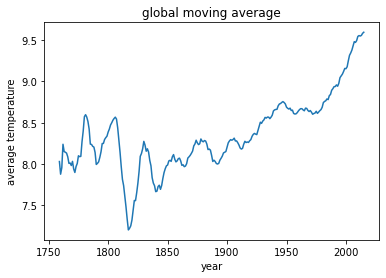

In [20]:
plt.plot(new_global_data["year"],new_global_data["10_Y_MA"])
plt.title('global moving average')
plt.xlabel('year')
plt.ylabel('average temperature')
plt.show()

# Plotting nearest city data

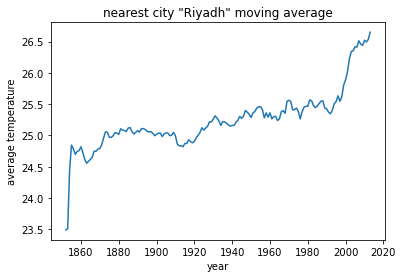

In [21]:
plt.plot(riyadh_data["year"],riyadh_data["10_Y_MA"])
plt.title('nearest city "Riyadh" moving average')
plt.xlabel('year')
plt.ylabel('average temperature')
plt.show()

# Compare between global and nearest city moving average temperature

#### A: Global 10 years moving average temperature
#### B: Nearest city "Riyadh" 10 years moving average temperature

### First: the start and end years for A and B should be the same, so the data will be equal in years to compare between A and B

In [22]:
min_global=new_global_data["year"].min()
max_global=new_global_data["year"].max()
min_nearest=riyadh_data["year"].min()
max_nearest=riyadh_data["year"].max()
print("global : ",min_global , max_global)
print("riyadh : ",min_nearest , max_nearest)

global :  1759 2015
riyadh :  1852 2013


In [23]:
final_global_data = new_global_data[new_global_data["year"]>=1852]
final_global_data = final_global_data[new_global_data["year"]<=2013]

/Users/mashaelalmus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### now the data are equal so we can compare

In [24]:
min_global=final_global_data["year"].min()
max_global=final_global_data["year"].max()
min_nearest=riyadh_data["year"].min()
max_nearest=riyadh_data["year"].max()
print("global : ",min_global , max_global)
print("riyadh : ",min_nearest , max_nearest)

global :  1852 2013
riyadh :  1852 2013


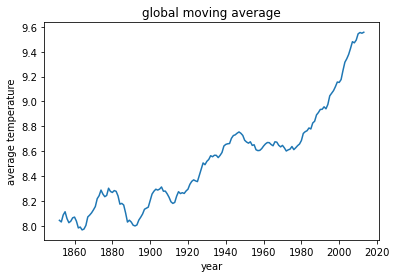

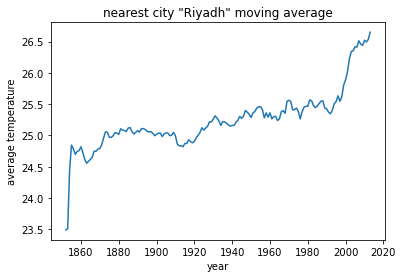

In [25]:
plt.plot(final_global_data["year"],final_global_data["10_Y_MA"])
plt.title('global moving average')
plt.xlabel('year')
plt.ylabel('average temperature')
plt.show()

plt.plot(riyadh_data["year"],riyadh_data["10_Y_MA"])
plt.title('nearest city "Riyadh" moving average')
plt.xlabel('year')
plt.ylabel('average temperature')
plt.show()

- the overall trends showed that both global and nearest city "Riyadh" tempratures are increasing over the years, 
   and the world is getting hotter over time.

differences:
- the city were I live "Riyadh" is hotter that global temprature, and it has been consistant over time. 
- from 1852 to 1855 the temprature in "Riyadh" has increased by 1.356, while the global temperature only increased 
  by only 0.069. 
- from 1880 to 1900 the temperature in "Riyadh" has approximatly the same, while the global temperature goes up 
  and down.

similarities:
- both the average temprature of global and nearest city "Riyadh" are increasing over the years.
- the world is getting hotter over time.
